Dataset: https://www.kaggle.com/ikarus777/best-artworks-of-all-time

In [221]:
#Importing modules

import tensorflow
from tensorflow.keras import models, layers, optimizers, regularizers
import numpy
import time
from matplotlib import pyplot
from sklearn.metrics import classification_report

In [222]:
#Importing the image data

path = 'H518 Project 1\official images'
#path should contain folders separating works of each artist
#Our filtered/cleaned dataset can be found here: https://drive.google.com/file/d/1IYN4oHVeJCPssstEyjvZCwUCrSodaWmk/view

shape = (227,227)
batch = 32
epochs = 50
imgTrain = tensorflow.keras.utils.image_dataset_from_directory(path,
                                                               seed = 300,
                                                               validation_split = 0.3,
                                                               subset = 'training',
                                                               image_size = shape,
                                                               batch_size = batch)
imgTest = tensorflow.keras.utils.image_dataset_from_directory(path,
                                                              seed = 300,
                                                              validation_split = 0.3,
                                                              subset = 'validation',
                                                              image_size = shape,
                                                              batch_size = batch)

Found 1337 files belonging to 4 classes.
Using 936 files for training.
Found 1337 files belonging to 4 classes.
Using 401 files for validation.


In [3]:
#Run models and evaluate performance

def Run(mod, epochs):
    tensorflow.random.set_seed(50)
    numpy.random.seed(50)
    start = time.time()
    img_fit = mod.fit(imgTrain, validation_data = imgTest, epochs = epochs)
    print('Average time: ' + str((time.time() - start)/epochs) + ' per epoch')
    print('Final accuracy: ' + str(img_fit.history['val_accuracy'][-1]))
    print('Max accuracy: ' + str(max(img_fit.history['val_accuracy'])))
    pyplot.plot(img_fit.history['val_accuracy'], label = 'Validation')
    pyplot.plot(img_fit.history['accuracy'], label = 'Training')
    pyplot.xlabel('Epochs')
    pyplot.ylabel('Accuracy')
    pyplot.ylim([0,1])
    pyplot.legend()
    pyplot.title('Accuracy over epochs')
    pyplot.show()
    return(img_fit.history['val_accuracy'][-1], max(img_fit.history['val_accuracy']))

Other possible ideas:

Using other models
Predicting region
Seeing if predicting artists from the same region is more difficult
Increasing class number
Adjusting hyperparameters and re-sizing
Transforming images to increase sample set (e.g. rotating images)

Epoch 1/50
30/30 [==============================] - 38s 1s/step - loss: 1.3771 - accuracy: 0.2788 - val_loss: 1.5199 - val_accuracy: 0.2494
Epoch 2/50
30/30 [==============================] - 35s 1s/step - loss: 1.3496 - accuracy: 0.3184 - val_loss: 1.3317 - val_accuracy: 0.3741
Epoch 3/50
30/30 [==============================] - 36s 1s/step - loss: 1.2976 - accuracy: 0.3878 - val_loss: 1.3717 - val_accuracy: 0.3541
Epoch 4/50
30/30 [==============================] - 38s 1s/step - loss: 1.2812 - accuracy: 0.3974 - val_loss: 1.2139 - val_accuracy: 0.4115
Epoch 5/50
30/30 [==============================] - 36s 1s/step - loss: 1.2093 - accuracy: 0.4466 - val_loss: 1.1964 - val_accuracy: 0.4514
Epoch 6/50
30/30 [==============================] - 35s 1s/step - loss: 1.1967 - accuracy: 0.4509 - val_loss: 1.2508 - val_accuracy: 0.4414
Epoch 7/50
30/30 [==============================] - 36s 1s/step - loss: 1.1815 - accuracy: 0.4509 - val_loss: 1.1764 - val_accuracy: 0.4414
Epoch 8/50
30/30 [==

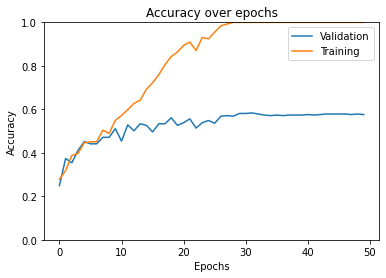

(0.576059877872467, 0.5835411548614502)

In [13]:
#Original ALEXNet

tensorflow.random.set_seed(50)
numpy.random.seed(50)

img_mod = models.Sequential()
img_mod.add(layers.Rescaling(1/255))
img_mod.add(layers.Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(256, kernel_size = (5,5), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Flatten())
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

Run(img_mod, epochs)

In [2]:
#ALEXNet Function

def AlexModW(epochs, width_prop):  #width_prop adjusts filters per layer
    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(int(96*width_prop),
                              kernel_size = (11,11),
                              strides = (4,4),
                              activation = 'relu',
                              input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(int(256*width_prop),
                              kernel_size = (5,5),
                              activation = 'relu',
                              padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(int(384*width_prop),
                              kernel_size = (3,3),
                              activation = 'relu',
                              padding = 'same'))
    img_mod.add(layers.Conv2D(int(384*width_prop),
                              kernel_size = (3,3),
                              activation = 'relu',
                              padding = 'same'))
    img_mod.add(layers.Conv2D(int(256*width_prop),
                              kernel_size = (3,3),
                              activation = 'relu',
                              padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dense(int(4096*width_prop), activation = 'relu'))
    img_mod.add(layers.Dense(int(4096*width_prop), activation = 'relu'))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])
    
    return(Run(img_mod, epochs))

--------------------------------
prop: 0.03125
--------------------------------
Epoch 1/50
30/30 [==============================] - 4s 106ms/step - loss: 1.3898 - accuracy: 0.2404 - val_loss: 1.3834 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 4s 111ms/step - loss: 1.3833 - accuracy: 0.2767 - val_loss: 1.3819 - val_accuracy: 0.2618
Epoch 3/50
30/30 [==============================] - 4s 110ms/step - loss: 1.3812 - accuracy: 0.2853 - val_loss: 1.3808 - val_accuracy: 0.2768
Epoch 4/50
30/30 [==============================] - 3s 103ms/step - loss: 1.3788 - accuracy: 0.3152 - val_loss: 1.3787 - val_accuracy: 0.2793
Epoch 5/50
30/30 [==============================] - 3s 101ms/step - loss: 1.3739 - accuracy: 0.3056 - val_loss: 1.3735 - val_accuracy: 0.3292
Epoch 6/50
30/30 [==============================] - 3s 101ms/step - loss: 1.3641 - accuracy: 0.3376 - val_loss: 1.3684 - val_accuracy: 0.3292
Epoch 7/50
30/30 [==============================] - 3s 102ms/step - 

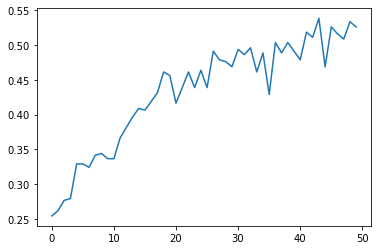

Epoch 1/50
30/30 [==============================] - 4s 107ms/step - loss: 1.3891 - accuracy: 0.2404 - val_loss: 1.3827 - val_accuracy: 0.2444
Epoch 2/50
30/30 [==============================] - 3s 104ms/step - loss: 1.3834 - accuracy: 0.2959 - val_loss: 1.3821 - val_accuracy: 0.3217
Epoch 3/50
30/30 [==============================] - 3s 105ms/step - loss: 1.3817 - accuracy: 0.2821 - val_loss: 1.3806 - val_accuracy: 0.2793
Epoch 4/50
30/30 [==============================] - 3s 108ms/step - loss: 1.3785 - accuracy: 0.2799 - val_loss: 1.3790 - val_accuracy: 0.2768
Epoch 5/50
30/30 [==============================] - 4s 110ms/step - loss: 1.3744 - accuracy: 0.2938 - val_loss: 1.3732 - val_accuracy: 0.2993
Epoch 6/50
30/30 [==============================] - 3s 107ms/step - loss: 1.3662 - accuracy: 0.3259 - val_loss: 1.3660 - val_accuracy: 0.3192
Epoch 7/50
30/30 [==============================] - 3s 107ms/step - loss: 1.3529 - accuracy: 0.3194 - val_loss: 1.3575 - val_accuracy: 0.3367
Epoch 

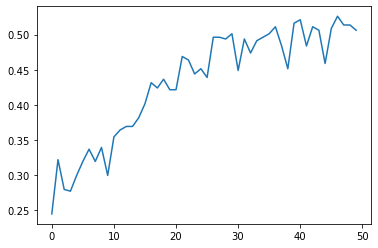

Epoch 1/50
30/30 [==============================] - 4s 111ms/step - loss: 1.3887 - accuracy: 0.2340 - val_loss: 1.3831 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 4s 110ms/step - loss: 1.3834 - accuracy: 0.2981 - val_loss: 1.3826 - val_accuracy: 0.2893
Epoch 3/50
30/30 [==============================] - 4s 108ms/step - loss: 1.3818 - accuracy: 0.2810 - val_loss: 1.3811 - val_accuracy: 0.2743
Epoch 4/50
30/30 [==============================] - 4s 109ms/step - loss: 1.3792 - accuracy: 0.3045 - val_loss: 1.3790 - val_accuracy: 0.3067
Epoch 5/50
30/30 [==============================] - 4s 111ms/step - loss: 1.3745 - accuracy: 0.2938 - val_loss: 1.3740 - val_accuracy: 0.2943
Epoch 6/50
30/30 [==============================] - 4s 114ms/step - loss: 1.3678 - accuracy: 0.3344 - val_loss: 1.3685 - val_accuracy: 0.3516
Epoch 7/50
30/30 [==============================] - 4s 109ms/step - loss: 1.3567 - accuracy: 0.3419 - val_loss: 1.3648 - val_accuracy: 0.3192
Epoch 

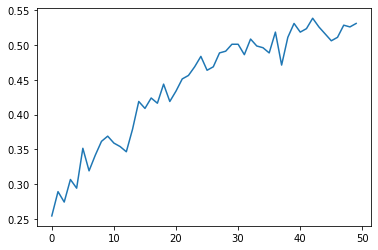

Epoch 1/50
30/30 [==============================] - 4s 110ms/step - loss: 1.3903 - accuracy: 0.2340 - val_loss: 1.3834 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 3s 107ms/step - loss: 1.3837 - accuracy: 0.2799 - val_loss: 1.3823 - val_accuracy: 0.2793
Epoch 3/50
30/30 [==============================] - 3s 103ms/step - loss: 1.3818 - accuracy: 0.2938 - val_loss: 1.3812 - val_accuracy: 0.2718
Epoch 4/50
30/30 [==============================] - 3s 104ms/step - loss: 1.3787 - accuracy: 0.2778 - val_loss: 1.3782 - val_accuracy: 0.2768
Epoch 5/50
30/30 [==============================] - 3s 105ms/step - loss: 1.3752 - accuracy: 0.2927 - val_loss: 1.3746 - val_accuracy: 0.2818
Epoch 6/50
30/30 [==============================] - 3s 107ms/step - loss: 1.3691 - accuracy: 0.3184 - val_loss: 1.3691 - val_accuracy: 0.3067
Epoch 7/50
30/30 [==============================] - 4s 111ms/step - loss: 1.3588 - accuracy: 0.3301 - val_loss: 1.3602 - val_accuracy: 0.3466
Epoch 

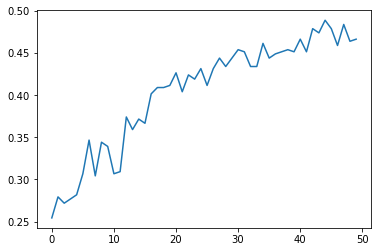

Epoch 1/50
30/30 [==============================] - 4s 115ms/step - loss: 1.3889 - accuracy: 0.2404 - val_loss: 1.3828 - val_accuracy: 0.2594
Epoch 2/50
30/30 [==============================] - 4s 110ms/step - loss: 1.3831 - accuracy: 0.2810 - val_loss: 1.3824 - val_accuracy: 0.2968
Epoch 3/50
30/30 [==============================] - 3s 108ms/step - loss: 1.3811 - accuracy: 0.2853 - val_loss: 1.3804 - val_accuracy: 0.2893
Epoch 4/50
30/30 [==============================] - 4s 108ms/step - loss: 1.3778 - accuracy: 0.3002 - val_loss: 1.3779 - val_accuracy: 0.2768
Epoch 5/50
30/30 [==============================] - 3s 105ms/step - loss: 1.3727 - accuracy: 0.3184 - val_loss: 1.3734 - val_accuracy: 0.2993
Epoch 6/50
30/30 [==============================] - 3s 103ms/step - loss: 1.3653 - accuracy: 0.3387 - val_loss: 1.3667 - val_accuracy: 0.2993
Epoch 7/50
30/30 [==============================] - 3s 104ms/step - loss: 1.3502 - accuracy: 0.3494 - val_loss: 1.3665 - val_accuracy: 0.3167
Epoch 

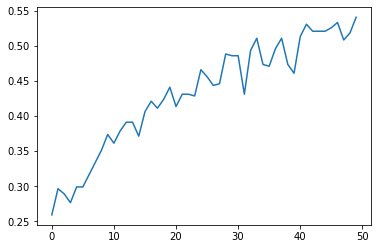

--------------------------------
prop: 0.0625
--------------------------------
Epoch 1/50
30/30 [==============================] - 4s 117ms/step - loss: 1.3845 - accuracy: 0.2553 - val_loss: 1.3790 - val_accuracy: 0.2668
Epoch 2/50
30/30 [==============================] - 4s 112ms/step - loss: 1.3747 - accuracy: 0.2564 - val_loss: 1.3635 - val_accuracy: 0.2768
Epoch 3/50
30/30 [==============================] - 4s 111ms/step - loss: 1.3520 - accuracy: 0.3387 - val_loss: 1.3239 - val_accuracy: 0.3716
Epoch 4/50
30/30 [==============================] - 4s 113ms/step - loss: 1.3384 - accuracy: 0.3665 - val_loss: 1.3001 - val_accuracy: 0.4214
Epoch 5/50
30/30 [==============================] - 4s 114ms/step - loss: 1.2856 - accuracy: 0.4049 - val_loss: 1.2577 - val_accuracy: 0.4389
Epoch 6/50
30/30 [==============================] - 4s 117ms/step - loss: 1.2654 - accuracy: 0.4071 - val_loss: 1.2705 - val_accuracy: 0.4264
Epoch 7/50
30/30 [==============================] - 4s 119ms/step - l

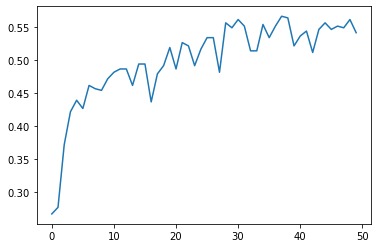

Epoch 1/50
30/30 [==============================] - 4s 117ms/step - loss: 1.3845 - accuracy: 0.2532 - val_loss: 1.3796 - val_accuracy: 0.2519
Epoch 2/50
30/30 [==============================] - 4s 113ms/step - loss: 1.3709 - accuracy: 0.2746 - val_loss: 1.3656 - val_accuracy: 0.2643
Epoch 3/50
30/30 [==============================] - 4s 115ms/step - loss: 1.3460 - accuracy: 0.3568 - val_loss: 1.3194 - val_accuracy: 0.4314
Epoch 4/50
30/30 [==============================] - 4s 123ms/step - loss: 1.2951 - accuracy: 0.3985 - val_loss: 1.2586 - val_accuracy: 0.4564
Epoch 5/50
30/30 [==============================] - 4s 115ms/step - loss: 1.2526 - accuracy: 0.4135 - val_loss: 1.2231 - val_accuracy: 0.4589
Epoch 6/50
30/30 [==============================] - 4s 114ms/step - loss: 1.2292 - accuracy: 0.4348 - val_loss: 1.2096 - val_accuracy: 0.4464
Epoch 7/50
30/30 [==============================] - 4s 115ms/step - loss: 1.2155 - accuracy: 0.4466 - val_loss: 1.2441 - val_accuracy: 0.4414
Epoch 

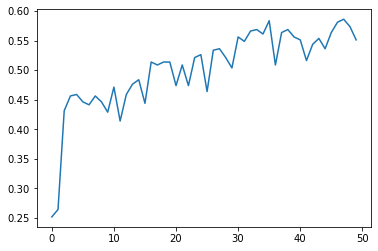

Epoch 1/50
30/30 [==============================] - 4s 118ms/step - loss: 1.3838 - accuracy: 0.2500 - val_loss: 1.3781 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 4s 115ms/step - loss: 1.3738 - accuracy: 0.2821 - val_loss: 1.3647 - val_accuracy: 0.2743
Epoch 3/50
30/30 [==============================] - 4s 115ms/step - loss: 1.3512 - accuracy: 0.3515 - val_loss: 1.3193 - val_accuracy: 0.4339
Epoch 4/50
30/30 [==============================] - 4s 115ms/step - loss: 1.3000 - accuracy: 0.3910 - val_loss: 1.3068 - val_accuracy: 0.3990
Epoch 5/50
30/30 [==============================] - 4s 117ms/step - loss: 1.2660 - accuracy: 0.4145 - val_loss: 1.3147 - val_accuracy: 0.4015
Epoch 6/50
30/30 [==============================] - 4s 121ms/step - loss: 1.2395 - accuracy: 0.4252 - val_loss: 1.2088 - val_accuracy: 0.4514
Epoch 7/50
30/30 [==============================] - 4s 119ms/step - loss: 1.2076 - accuracy: 0.4476 - val_loss: 1.2383 - val_accuracy: 0.4090
Epoch 

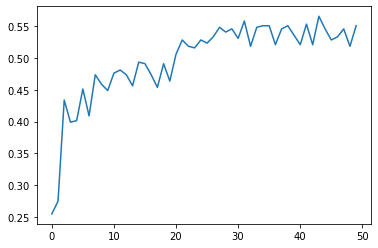

Epoch 1/50
30/30 [==============================] - 4s 121ms/step - loss: 1.3845 - accuracy: 0.2511 - val_loss: 1.3808 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 4s 120ms/step - loss: 1.3803 - accuracy: 0.2991 - val_loss: 1.3770 - val_accuracy: 0.2544
Epoch 3/50
30/30 [==============================] - 4s 123ms/step - loss: 1.3687 - accuracy: 0.3162 - val_loss: 1.3684 - val_accuracy: 0.2594
Epoch 4/50
30/30 [==============================] - 4s 123ms/step - loss: 1.3472 - accuracy: 0.3600 - val_loss: 1.3345 - val_accuracy: 0.3541
Epoch 5/50
30/30 [==============================] - 4s 121ms/step - loss: 1.2966 - accuracy: 0.4145 - val_loss: 1.2466 - val_accuracy: 0.4339
Epoch 6/50
30/30 [==============================] - 4s 117ms/step - loss: 1.2576 - accuracy: 0.4145 - val_loss: 1.2269 - val_accuracy: 0.4339
Epoch 7/50
30/30 [==============================] - 4s 117ms/step - loss: 1.2303 - accuracy: 0.4220 - val_loss: 1.2093 - val_accuracy: 0.4713
Epoch 

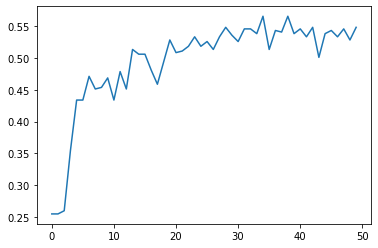

Epoch 1/50
30/30 [==============================] - 4s 125ms/step - loss: 1.3841 - accuracy: 0.2532 - val_loss: 1.3797 - val_accuracy: 0.2544
Epoch 2/50
30/30 [==============================] - 4s 116ms/step - loss: 1.3762 - accuracy: 0.2714 - val_loss: 1.3709 - val_accuracy: 0.2718
Epoch 3/50
30/30 [==============================] - 4s 114ms/step - loss: 1.3599 - accuracy: 0.3397 - val_loss: 1.3361 - val_accuracy: 0.3491
Epoch 4/50
30/30 [==============================] - 4s 114ms/step - loss: 1.3133 - accuracy: 0.3900 - val_loss: 1.3194 - val_accuracy: 0.3441
Epoch 5/50
30/30 [==============================] - 4s 115ms/step - loss: 1.2656 - accuracy: 0.4049 - val_loss: 1.2486 - val_accuracy: 0.4389
Epoch 6/50
30/30 [==============================] - 4s 114ms/step - loss: 1.2516 - accuracy: 0.4060 - val_loss: 1.2156 - val_accuracy: 0.4439
Epoch 7/50
30/30 [==============================] - 4s 115ms/step - loss: 1.2415 - accuracy: 0.4434 - val_loss: 1.2064 - val_accuracy: 0.4464
Epoch 

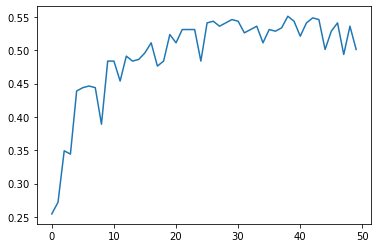

--------------------------------
prop: 0.125
--------------------------------
Epoch 1/50
30/30 [==============================] - 5s 140ms/step - loss: 1.3842 - accuracy: 0.2382 - val_loss: 1.3786 - val_accuracy: 0.2519
Epoch 2/50
30/30 [==============================] - 4s 139ms/step - loss: 1.3714 - accuracy: 0.2553 - val_loss: 1.3545 - val_accuracy: 0.3915
Epoch 3/50
30/30 [==============================] - 4s 139ms/step - loss: 1.3255 - accuracy: 0.3857 - val_loss: 1.3431 - val_accuracy: 0.3591
Epoch 4/50
30/30 [==============================] - 5s 143ms/step - loss: 1.2868 - accuracy: 0.4135 - val_loss: 1.2324 - val_accuracy: 0.4938
Epoch 5/50
30/30 [==============================] - 5s 142ms/step - loss: 1.1980 - accuracy: 0.4583 - val_loss: 1.1808 - val_accuracy: 0.4813
Epoch 6/50
30/30 [==============================] - 5s 143ms/step - loss: 1.1399 - accuracy: 0.4979 - val_loss: 1.1683 - val_accuracy: 0.4613
Epoch 7/50
30/30 [==============================] - 4s 138ms/step - lo

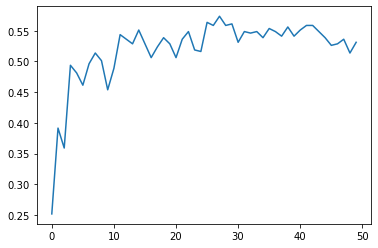

Epoch 1/50
30/30 [==============================] - 5s 147ms/step - loss: 1.3824 - accuracy: 0.2959 - val_loss: 1.3715 - val_accuracy: 0.2868
Epoch 2/50
30/30 [==============================] - 5s 143ms/step - loss: 1.3535 - accuracy: 0.3771 - val_loss: 1.3560 - val_accuracy: 0.3292
Epoch 3/50
30/30 [==============================] - 4s 137ms/step - loss: 1.2796 - accuracy: 0.4220 - val_loss: 1.4119 - val_accuracy: 0.3092
Epoch 4/50
30/30 [==============================] - 4s 139ms/step - loss: 1.2500 - accuracy: 0.4241 - val_loss: 1.2005 - val_accuracy: 0.4763
Epoch 5/50
30/30 [==============================] - 4s 139ms/step - loss: 1.2241 - accuracy: 0.4338 - val_loss: 1.2753 - val_accuracy: 0.4015
Epoch 6/50
30/30 [==============================] - 4s 139ms/step - loss: 1.1752 - accuracy: 0.4797 - val_loss: 1.2009 - val_accuracy: 0.4489
Epoch 7/50
30/30 [==============================] - 4s 139ms/step - loss: 1.1357 - accuracy: 0.4979 - val_loss: 1.1475 - val_accuracy: 0.4888
Epoch 

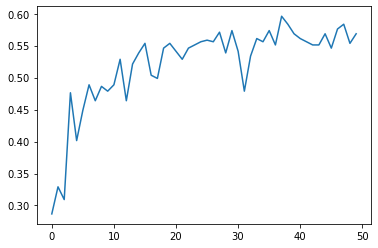

Epoch 1/50
30/30 [==============================] - 5s 145ms/step - loss: 1.3876 - accuracy: 0.2457 - val_loss: 1.3812 - val_accuracy: 0.2519
Epoch 2/50
30/30 [==============================] - 4s 140ms/step - loss: 1.3754 - accuracy: 0.3205 - val_loss: 1.3666 - val_accuracy: 0.2569
Epoch 3/50
30/30 [==============================] - 4s 142ms/step - loss: 1.3463 - accuracy: 0.3237 - val_loss: 1.3278 - val_accuracy: 0.3416
Epoch 4/50
30/30 [==============================] - 4s 142ms/step - loss: 1.2607 - accuracy: 0.4135 - val_loss: 1.2177 - val_accuracy: 0.4264
Epoch 5/50
30/30 [==============================] - 5s 153ms/step - loss: 1.2021 - accuracy: 0.4487 - val_loss: 1.2119 - val_accuracy: 0.4464
Epoch 6/50
30/30 [==============================] - 5s 141ms/step - loss: 1.2064 - accuracy: 0.4402 - val_loss: 1.1836 - val_accuracy: 0.4564
Epoch 7/50
30/30 [==============================] - 5s 148ms/step - loss: 1.1411 - accuracy: 0.4776 - val_loss: 1.3179 - val_accuracy: 0.3865
Epoch 

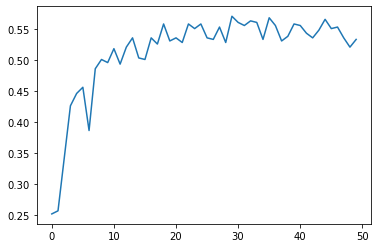

Epoch 1/50
30/30 [==============================] - 6s 178ms/step - loss: 1.3838 - accuracy: 0.2607 - val_loss: 1.3768 - val_accuracy: 0.2643
Epoch 2/50
30/30 [==============================] - 5s 157ms/step - loss: 1.3694 - accuracy: 0.2991 - val_loss: 1.3542 - val_accuracy: 0.2768
Epoch 3/50
30/30 [==============================] - 4s 138ms/step - loss: 1.3081 - accuracy: 0.3996 - val_loss: 1.3379 - val_accuracy: 0.3541
Epoch 4/50
30/30 [==============================] - 4s 136ms/step - loss: 1.2480 - accuracy: 0.4252 - val_loss: 1.2336 - val_accuracy: 0.4140
Epoch 5/50
30/30 [==============================] - 4s 137ms/step - loss: 1.2171 - accuracy: 0.4316 - val_loss: 1.1658 - val_accuracy: 0.4713
Epoch 6/50
30/30 [==============================] - 4s 140ms/step - loss: 1.1657 - accuracy: 0.4733 - val_loss: 1.1438 - val_accuracy: 0.4663
Epoch 7/50
30/30 [==============================] - 4s 136ms/step - loss: 1.1796 - accuracy: 0.4850 - val_loss: 1.1453 - val_accuracy: 0.4913
Epoch 

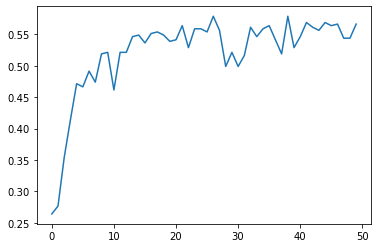

Epoch 1/50
30/30 [==============================] - 5s 138ms/step - loss: 1.3831 - accuracy: 0.2874 - val_loss: 1.3751 - val_accuracy: 0.2569
Epoch 2/50
30/30 [==============================] - 4s 138ms/step - loss: 1.3593 - accuracy: 0.3782 - val_loss: 1.3530 - val_accuracy: 0.3441
Epoch 3/50
30/30 [==============================] - 5s 145ms/step - loss: 1.2907 - accuracy: 0.4092 - val_loss: 1.2243 - val_accuracy: 0.4489
Epoch 4/50
30/30 [==============================] - 5s 142ms/step - loss: 1.2189 - accuracy: 0.4402 - val_loss: 1.3176 - val_accuracy: 0.4090
Epoch 5/50
30/30 [==============================] - 4s 136ms/step - loss: 1.1910 - accuracy: 0.4669 - val_loss: 1.1749 - val_accuracy: 0.4813
Epoch 6/50
30/30 [==============================] - 4s 138ms/step - loss: 1.1591 - accuracy: 0.4765 - val_loss: 1.1520 - val_accuracy: 0.4913
Epoch 7/50
30/30 [==============================] - 4s 136ms/step - loss: 1.1418 - accuracy: 0.4850 - val_loss: 1.1660 - val_accuracy: 0.4688
Epoch 

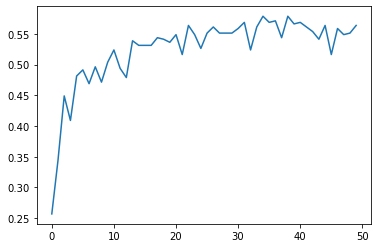

--------------------------------
prop: 0.25
--------------------------------
Epoch 1/50
30/30 [==============================] - 7s 201ms/step - loss: 1.3758 - accuracy: 0.2885 - val_loss: 1.3442 - val_accuracy: 0.3616
Epoch 2/50
30/30 [==============================] - 6s 208ms/step - loss: 1.2927 - accuracy: 0.3846 - val_loss: 1.2297 - val_accuracy: 0.4214
Epoch 3/50
30/30 [==============================] - 7s 210ms/step - loss: 1.2520 - accuracy: 0.4081 - val_loss: 1.1901 - val_accuracy: 0.4738
Epoch 4/50
30/30 [==============================] - 6s 203ms/step - loss: 1.1780 - accuracy: 0.4679 - val_loss: 1.1559 - val_accuracy: 0.4738
Epoch 5/50
30/30 [==============================] - 6s 194ms/step - loss: 1.1495 - accuracy: 0.4904 - val_loss: 1.1264 - val_accuracy: 0.4938
Epoch 6/50
30/30 [==============================] - 7s 210ms/step - loss: 1.0955 - accuracy: 0.5085 - val_loss: 1.1121 - val_accuracy: 0.5037
Epoch 7/50
30/30 [==============================] - 6s 207ms/step - los

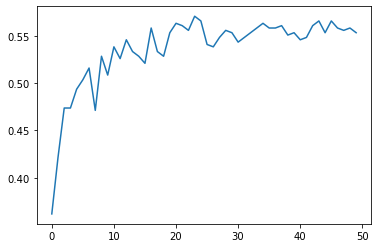

Epoch 1/50
30/30 [==============================] - 7s 208ms/step - loss: 1.3765 - accuracy: 0.2874 - val_loss: 1.3635 - val_accuracy: 0.2594
Epoch 2/50
30/30 [==============================] - 6s 198ms/step - loss: 1.3461 - accuracy: 0.3237 - val_loss: 1.2954 - val_accuracy: 0.4214
Epoch 3/50
30/30 [==============================] - 6s 194ms/step - loss: 1.2690 - accuracy: 0.4167 - val_loss: 1.2980 - val_accuracy: 0.3965
Epoch 4/50
30/30 [==============================] - 6s 202ms/step - loss: 1.2468 - accuracy: 0.4306 - val_loss: 1.2510 - val_accuracy: 0.4190
Epoch 5/50
30/30 [==============================] - 6s 206ms/step - loss: 1.1879 - accuracy: 0.4765 - val_loss: 1.1360 - val_accuracy: 0.4813
Epoch 6/50
30/30 [==============================] - 6s 204ms/step - loss: 1.1129 - accuracy: 0.5299 - val_loss: 1.1402 - val_accuracy: 0.5162
Epoch 7/50
30/30 [==============================] - 6s 203ms/step - loss: 1.1142 - accuracy: 0.5246 - val_loss: 1.2177 - val_accuracy: 0.4439
Epoch 

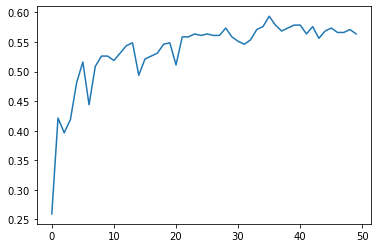

Epoch 1/50
30/30 [==============================] - 7s 203ms/step - loss: 1.3829 - accuracy: 0.2746 - val_loss: 1.3592 - val_accuracy: 0.3716
Epoch 2/50
30/30 [==============================] - 6s 197ms/step - loss: 1.3226 - accuracy: 0.3739 - val_loss: 1.2984 - val_accuracy: 0.3865
Epoch 3/50
30/30 [==============================] - 6s 199ms/step - loss: 1.2707 - accuracy: 0.3900 - val_loss: 1.2977 - val_accuracy: 0.3741
Epoch 4/50
30/30 [==============================] - 7s 210ms/step - loss: 1.2275 - accuracy: 0.4412 - val_loss: 1.2411 - val_accuracy: 0.4414
Epoch 5/50
30/30 [==============================] - 6s 203ms/step - loss: 1.1988 - accuracy: 0.4466 - val_loss: 1.2194 - val_accuracy: 0.4364
Epoch 6/50
30/30 [==============================] - 6s 204ms/step - loss: 1.1356 - accuracy: 0.4915 - val_loss: 1.1113 - val_accuracy: 0.5137
Epoch 7/50
30/30 [==============================] - 6s 200ms/step - loss: 1.0629 - accuracy: 0.5524 - val_loss: 1.1740 - val_accuracy: 0.5187
Epoch 

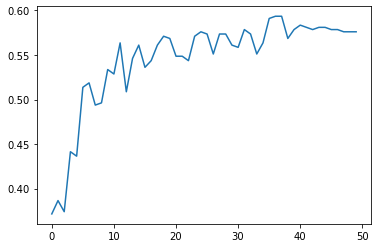

Epoch 1/50
30/30 [==============================] - 7s 205ms/step - loss: 1.3733 - accuracy: 0.2970 - val_loss: 1.3272 - val_accuracy: 0.4414
Epoch 2/50
30/30 [==============================] - 6s 204ms/step - loss: 1.2785 - accuracy: 0.4006 - val_loss: 1.2011 - val_accuracy: 0.4514
Epoch 3/50
30/30 [==============================] - 6s 197ms/step - loss: 1.2064 - accuracy: 0.4573 - val_loss: 1.1630 - val_accuracy: 0.4838
Epoch 4/50
30/30 [==============================] - 6s 199ms/step - loss: 1.1440 - accuracy: 0.4829 - val_loss: 1.3924 - val_accuracy: 0.4115
Epoch 5/50
30/30 [==============================] - 6s 198ms/step - loss: 1.1470 - accuracy: 0.4979 - val_loss: 1.1778 - val_accuracy: 0.4813
Epoch 6/50
30/30 [==============================] - 6s 198ms/step - loss: 1.0946 - accuracy: 0.5160 - val_loss: 1.1181 - val_accuracy: 0.5012
Epoch 7/50
30/30 [==============================] - 6s 198ms/step - loss: 1.0575 - accuracy: 0.5288 - val_loss: 1.1249 - val_accuracy: 0.4938
Epoch 

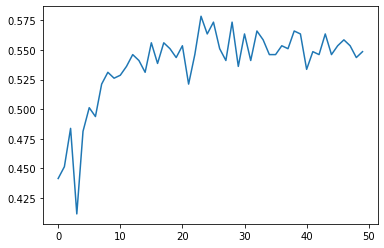

Epoch 1/50
30/30 [==============================] - 7s 206ms/step - loss: 1.3819 - accuracy: 0.2885 - val_loss: 1.3620 - val_accuracy: 0.2993
Epoch 2/50
30/30 [==============================] - 6s 205ms/step - loss: 1.3180 - accuracy: 0.3868 - val_loss: 1.2512 - val_accuracy: 0.4439
Epoch 3/50
30/30 [==============================] - 6s 204ms/step - loss: 1.2275 - accuracy: 0.4679 - val_loss: 1.1711 - val_accuracy: 0.4838
Epoch 4/50
30/30 [==============================] - 7s 214ms/step - loss: 1.2129 - accuracy: 0.4658 - val_loss: 1.1644 - val_accuracy: 0.4988
Epoch 5/50
30/30 [==============================] - 6s 203ms/step - loss: 1.1137 - accuracy: 0.5160 - val_loss: 1.1315 - val_accuracy: 0.5062
Epoch 6/50
30/30 [==============================] - 7s 209ms/step - loss: 1.1356 - accuracy: 0.5064 - val_loss: 1.1714 - val_accuracy: 0.4938
Epoch 7/50
30/30 [==============================] - 6s 203ms/step - loss: 1.0897 - accuracy: 0.5160 - val_loss: 1.1250 - val_accuracy: 0.5162
Epoch 

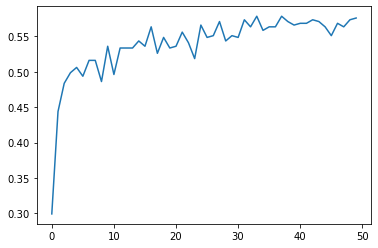

In [35]:
props = [2**-5, 2**-4, 2**-3, 2**-2]    #Proportions of filters to keep
results = []
for i in props:
    print('--------------------------------')
    print('prop: ' + str(i))
    print('--------------------------------')
    acc = []
    for j in range(5):                  #Number of trials per proportion (will take average of results)
        acc.append(AlexModW(epochs, i)[1])
    results.append(sum(acc)/len(acc))

In [41]:
results

[0.5266832947731018,
 0.5670822978019714,
 0.5795511245727539,
 0.5830424070358277]

Epoch 1/50
30/30 [==============================] - 34s 1s/step - loss: 1.3816 - accuracy: 0.2671 - val_loss: 1.3485 - val_accuracy: 0.2768
Epoch 2/50
30/30 [==============================] - 31s 1s/step - loss: 1.3149 - accuracy: 0.3494 - val_loss: 1.4958 - val_accuracy: 0.3591
Epoch 3/50
30/30 [==============================] - 32s 1s/step - loss: 1.2842 - accuracy: 0.3600 - val_loss: 1.2818 - val_accuracy: 0.4040
Epoch 4/50
30/30 [==============================] - 33s 1s/step - loss: 1.2923 - accuracy: 0.3718 - val_loss: 1.3210 - val_accuracy: 0.3466
Epoch 5/50
30/30 [==============================] - 33s 1s/step - loss: 1.2822 - accuracy: 0.3643 - val_loss: 1.2913 - val_accuracy: 0.3367
Epoch 6/50
30/30 [==============================] - 33s 1s/step - loss: 1.2773 - accuracy: 0.3761 - val_loss: 1.2560 - val_accuracy: 0.3741
Epoch 7/50
30/30 [==============================] - 32s 1s/step - loss: 1.2361 - accuracy: 0.3942 - val_loss: 1.2986 - val_accuracy: 0.3217
Epoch 8/50
30/30 [==

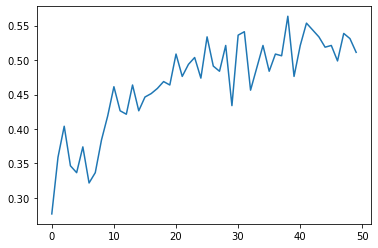

(0.5112219452857971, 0.5635910034179688)

In [50]:
#ALEXNet with added layers

tensorflow.random.set_seed(50)
numpy.random.seed(50)

img_mod = models.Sequential()
img_mod.add(layers.Rescaling(1/255))
img_mod.add(layers.Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(256, kernel_size = (5,5), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(256, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Flatten())
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Run(img_mod, epochs)

Epoch 1/50
30/30 [==============================] - 29s 912ms/step - loss: 1.3454 - accuracy: 0.3333 - val_loss: 1.4290 - val_accuracy: 0.3042
Epoch 2/50
30/30 [==============================] - 27s 908ms/step - loss: 1.3191 - accuracy: 0.3964 - val_loss: 1.2558 - val_accuracy: 0.4214
Epoch 3/50
30/30 [==============================] - 27s 891ms/step - loss: 1.1968 - accuracy: 0.4722 - val_loss: 1.2164 - val_accuracy: 0.4389
Epoch 4/50
30/30 [==============================] - 27s 904ms/step - loss: 1.1608 - accuracy: 0.4925 - val_loss: 1.3937 - val_accuracy: 0.3990
Epoch 5/50
30/30 [==============================] - 27s 886ms/step - loss: 1.1090 - accuracy: 0.5107 - val_loss: 1.1193 - val_accuracy: 0.4863
Epoch 6/50
30/30 [==============================] - 27s 901ms/step - loss: 1.0252 - accuracy: 0.5673 - val_loss: 1.0739 - val_accuracy: 0.5212
Epoch 7/50
30/30 [==============================] - 27s 900ms/step - loss: 0.9653 - accuracy: 0.5812 - val_loss: 1.1582 - val_accuracy: 0.5012

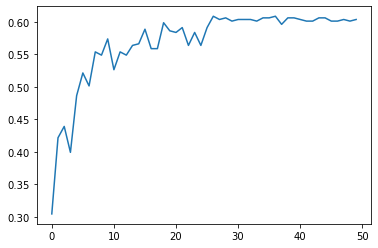

(0.6034912467002869, 0.6084787845611572)

In [51]:
#ALEXNet w/ three convolution layers removed

tensorflow.random.set_seed(50)
numpy.random.seed(50)

img_mod = models.Sequential()
img_mod.add(layers.Rescaling(1/255))
img_mod.add(layers.Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(256, kernel_size = (5,5), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Flatten())
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

Run(img_mod, epochs)

Epoch 1/50
30/30 [==============================] - 42s 1s/step - loss: 1.4183 - accuracy: 0.3013 - val_loss: 1.2769 - val_accuracy: 0.3890
Epoch 2/50
30/30 [==============================] - 41s 1s/step - loss: 1.2025 - accuracy: 0.4487 - val_loss: 1.2072 - val_accuracy: 0.4738
Epoch 3/50
30/30 [==============================] - 40s 1s/step - loss: 1.1475 - accuracy: 0.4893 - val_loss: 1.2188 - val_accuracy: 0.4364
Epoch 4/50
30/30 [==============================] - 40s 1s/step - loss: 1.0078 - accuracy: 0.5908 - val_loss: 1.2375 - val_accuracy: 0.4364
Epoch 5/50
30/30 [==============================] - 40s 1s/step - loss: 0.8855 - accuracy: 0.6325 - val_loss: 1.1150 - val_accuracy: 0.5262
Epoch 6/50
30/30 [==============================] - 41s 1s/step - loss: 0.8072 - accuracy: 0.6731 - val_loss: 1.1457 - val_accuracy: 0.5212
Epoch 7/50
30/30 [==============================] - 40s 1s/step - loss: 0.7651 - accuracy: 0.6987 - val_loss: 1.3803 - val_accuracy: 0.5187
Epoch 8/50
30/30 [==

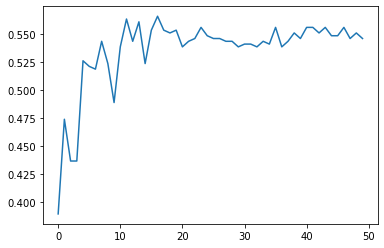

(0.5461346507072449, 0.5660848021507263)

In [52]:
#ALEXNet w/ four convolution layers removed

tensorflow.random.set_seed(50)
numpy.random.seed(50)

img_mod = models.Sequential()
img_mod.add(layers.Rescaling(1/255))
img_mod.add(layers.Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(256, kernel_size = (5,5), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Flatten())
img_mod.add(layers.Dense(4096, activation = 'relu'))
img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

Run(img_mod, epochs)

Epoch 1/50
30/30 [==============================] - 9s 281ms/step - loss: 1.3829 - accuracy: 0.2810 - val_loss: 1.3297 - val_accuracy: 0.3416
Epoch 2/50
30/30 [==============================] - 9s 278ms/step - loss: 1.2789 - accuracy: 0.3878 - val_loss: 1.2426 - val_accuracy: 0.4065
Epoch 3/50
30/30 [==============================] - 9s 304ms/step - loss: 1.2222 - accuracy: 0.4509 - val_loss: 1.2502 - val_accuracy: 0.4339
Epoch 4/50
30/30 [==============================] - 10s 334ms/step - loss: 1.1695 - accuracy: 0.4712 - val_loss: 1.1577 - val_accuracy: 0.4564
Epoch 5/50
30/30 [==============================] - 10s 312ms/step - loss: 1.1069 - accuracy: 0.5053 - val_loss: 1.3788 - val_accuracy: 0.3766
Epoch 6/50
30/30 [==============================] - 9s 294ms/step - loss: 1.0515 - accuracy: 0.5395 - val_loss: 1.1109 - val_accuracy: 0.4963
Epoch 7/50
30/30 [==============================] - 9s 302ms/step - loss: 1.0055 - accuracy: 0.5694 - val_loss: 1.2168 - val_accuracy: 0.4788
Epoc

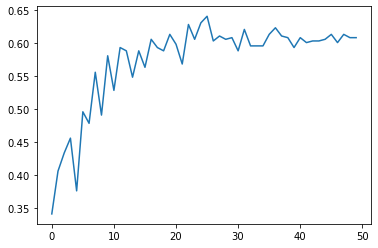

(0.6084787845611572, 0.6408977508544922)

In [53]:
#ALEXNet with two convolution layers removed and 1/2 as many filters per layer

tensorflow.random.set_seed(50)
numpy.random.seed(50)

img_mod = models.Sequential()
img_mod.add(layers.Rescaling(1/255))
img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
img_mod.add(layers.Flatten())
img_mod.add(layers.Dense(2048, activation = 'relu'))
img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

Run(img_mod, epochs)

#The model is still over-fitting. Try Dropout

In [10]:
#Latest model with Dropout

def TestDrop(epochs, p):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(p))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(p))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

--------------------------------
prop: 0.2
--------------------------------
Epoch 1/50
30/30 [==============================] - 10s 318ms/step - loss: 1.3844 - accuracy: 0.2938 - val_loss: 1.3540 - val_accuracy: 0.3217
Epoch 2/50
30/30 [==============================] - 9s 291ms/step - loss: 1.3298 - accuracy: 0.3697 - val_loss: 1.2769 - val_accuracy: 0.3840
Epoch 3/50
30/30 [==============================] - 9s 304ms/step - loss: 1.2215 - accuracy: 0.4455 - val_loss: 1.1554 - val_accuracy: 0.4763
Epoch 4/50
30/30 [==============================] - 9s 304ms/step - loss: 1.1741 - accuracy: 0.4818 - val_loss: 1.1823 - val_accuracy: 0.5112
Epoch 5/50
30/30 [==============================] - 9s 305ms/step - loss: 1.1084 - accuracy: 0.5085 - val_loss: 1.0987 - val_accuracy: 0.5037
Epoch 6/50
30/30 [==============================] - 10s 313ms/step - loss: 1.0779 - accuracy: 0.5310 - val_loss: 1.1412 - val_accuracy: 0.5087
Epoch 7/50
30/30 [==============================] - 10s 313ms/step - l

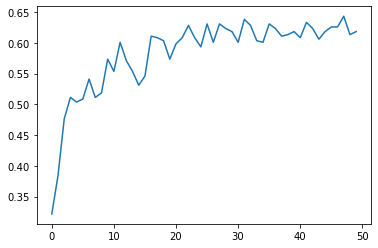

Epoch 1/50
30/30 [==============================] - 10s 307ms/step - loss: 1.3902 - accuracy: 0.2949 - val_loss: 1.3519 - val_accuracy: 0.3192
Epoch 2/50
30/30 [==============================] - 10s 314ms/step - loss: 1.3436 - accuracy: 0.3451 - val_loss: 1.3049 - val_accuracy: 0.3766
Epoch 3/50
30/30 [==============================] - 9s 292ms/step - loss: 1.2376 - accuracy: 0.4370 - val_loss: 1.2407 - val_accuracy: 0.3990
Epoch 4/50
30/30 [==============================] - 9s 287ms/step - loss: 1.1838 - accuracy: 0.4594 - val_loss: 1.2190 - val_accuracy: 0.4364
Epoch 5/50
30/30 [==============================] - 9s 290ms/step - loss: 1.1107 - accuracy: 0.5150 - val_loss: 1.1688 - val_accuracy: 0.4888
Epoch 6/50
30/30 [==============================] - 10s 322ms/step - loss: 1.0378 - accuracy: 0.5374 - val_loss: 1.1107 - val_accuracy: 0.5362
Epoch 7/50
30/30 [==============================] - 9s 289ms/step - loss: 1.0151 - accuracy: 0.5556 - val_loss: 1.0855 - val_accuracy: 0.5012
Epo

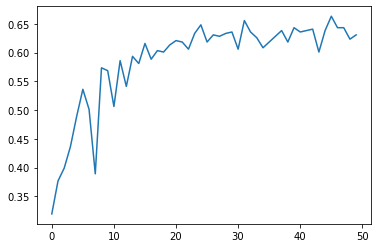

Epoch 1/50
30/30 [==============================] - 9s 289ms/step - loss: 1.3867 - accuracy: 0.2778 - val_loss: 1.3480 - val_accuracy: 0.3317
Epoch 2/50
30/30 [==============================] - 9s 301ms/step - loss: 1.3223 - accuracy: 0.3483 - val_loss: 1.2702 - val_accuracy: 0.4439
Epoch 3/50
30/30 [==============================] - 9s 307ms/step - loss: 1.2543 - accuracy: 0.4103 - val_loss: 1.2511 - val_accuracy: 0.4040
Epoch 4/50
30/30 [==============================] - 9s 298ms/step - loss: 1.1603 - accuracy: 0.4733 - val_loss: 1.1326 - val_accuracy: 0.4763
Epoch 5/50
30/30 [==============================] - 9s 307ms/step - loss: 1.1224 - accuracy: 0.5053 - val_loss: 1.1333 - val_accuracy: 0.5262
Epoch 6/50
30/30 [==============================] - 9s 304ms/step - loss: 1.0662 - accuracy: 0.5331 - val_loss: 1.0870 - val_accuracy: 0.5362
Epoch 7/50
30/30 [==============================] - 9s 291ms/step - loss: 1.0698 - accuracy: 0.5374 - val_loss: 1.0938 - val_accuracy: 0.5362
Epoch 

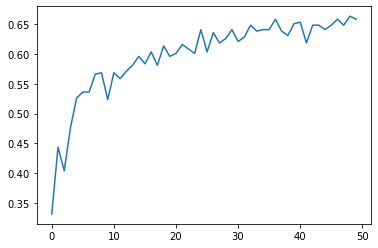

Epoch 1/50
30/30 [==============================] - 10s 298ms/step - loss: 1.3802 - accuracy: 0.2703 - val_loss: 1.3415 - val_accuracy: 0.2868
Epoch 2/50
30/30 [==============================] - 9s 289ms/step - loss: 1.3120 - accuracy: 0.4028 - val_loss: 1.2796 - val_accuracy: 0.3890
Epoch 3/50
30/30 [==============================] - 9s 294ms/step - loss: 1.2698 - accuracy: 0.4177 - val_loss: 1.2182 - val_accuracy: 0.4439
Epoch 4/50
30/30 [==============================] - 9s 293ms/step - loss: 1.1759 - accuracy: 0.4573 - val_loss: 1.1727 - val_accuracy: 0.4888
Epoch 5/50
30/30 [==============================] - 9s 291ms/step - loss: 1.1543 - accuracy: 0.4989 - val_loss: 1.1387 - val_accuracy: 0.4988
Epoch 6/50
30/30 [==============================] - 9s 294ms/step - loss: 1.0640 - accuracy: 0.5459 - val_loss: 1.2156 - val_accuracy: 0.4813
Epoch 7/50
30/30 [==============================] - 9s 306ms/step - loss: 1.0391 - accuracy: 0.5566 - val_loss: 1.0594 - val_accuracy: 0.5387
Epoch

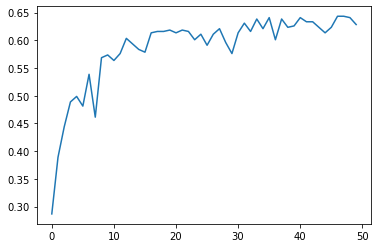

Epoch 1/50
30/30 [==============================] - 9s 292ms/step - loss: 1.3810 - accuracy: 0.2778 - val_loss: 1.3327 - val_accuracy: 0.3616
Epoch 2/50
30/30 [==============================] - 9s 293ms/step - loss: 1.3029 - accuracy: 0.3846 - val_loss: 1.2931 - val_accuracy: 0.3741
Epoch 3/50
30/30 [==============================] - 9s 295ms/step - loss: 1.2515 - accuracy: 0.4156 - val_loss: 1.2100 - val_accuracy: 0.4589
Epoch 4/50
30/30 [==============================] - 9s 296ms/step - loss: 1.1583 - accuracy: 0.5011 - val_loss: 1.3694 - val_accuracy: 0.3990
Epoch 5/50
30/30 [==============================] - 9s 301ms/step - loss: 1.1405 - accuracy: 0.4882 - val_loss: 1.1152 - val_accuracy: 0.5237
Epoch 6/50
30/30 [==============================] - 9s 303ms/step - loss: 1.0551 - accuracy: 0.5406 - val_loss: 1.1701 - val_accuracy: 0.4813
Epoch 7/50
30/30 [==============================] - 10s 318ms/step - loss: 0.9960 - accuracy: 0.5716 - val_loss: 1.0838 - val_accuracy: 0.5287
Epoch

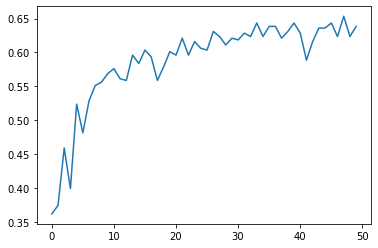

--------------------------------
prop: 0.35
--------------------------------
Epoch 1/50
30/30 [==============================] - 9s 283ms/step - loss: 1.3834 - accuracy: 0.2970 - val_loss: 1.3581 - val_accuracy: 0.3616
Epoch 2/50
30/30 [==============================] - 9s 306ms/step - loss: 1.3049 - accuracy: 0.3878 - val_loss: 1.2626 - val_accuracy: 0.4214
Epoch 3/50
30/30 [==============================] - 9s 297ms/step - loss: 1.2304 - accuracy: 0.4338 - val_loss: 1.2729 - val_accuracy: 0.4015
Epoch 4/50
30/30 [==============================] - 9s 308ms/step - loss: 1.1658 - accuracy: 0.4818 - val_loss: 1.1285 - val_accuracy: 0.5212
Epoch 5/50
30/30 [==============================] - 9s 302ms/step - loss: 1.1212 - accuracy: 0.5000 - val_loss: 1.1344 - val_accuracy: 0.5012
Epoch 6/50
30/30 [==============================] - 9s 303ms/step - loss: 1.1025 - accuracy: 0.5224 - val_loss: 1.3096 - val_accuracy: 0.3716
Epoch 7/50
30/30 [==============================] - 9s 297ms/step - los

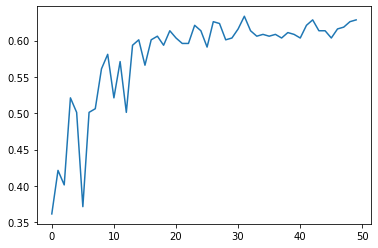

Epoch 1/50
30/30 [==============================] - 11s 315ms/step - loss: 1.3906 - accuracy: 0.2511 - val_loss: 1.3592 - val_accuracy: 0.2643
Epoch 2/50
30/30 [==============================] - 9s 295ms/step - loss: 1.3127 - accuracy: 0.4060 - val_loss: 1.2400 - val_accuracy: 0.4090
Epoch 3/50
30/30 [==============================] - 10s 318ms/step - loss: 1.2472 - accuracy: 0.4081 - val_loss: 1.2416 - val_accuracy: 0.4214
Epoch 4/50
30/30 [==============================] - 9s 296ms/step - loss: 1.2041 - accuracy: 0.4744 - val_loss: 1.2476 - val_accuracy: 0.4589
Epoch 5/50
30/30 [==============================] - 9s 299ms/step - loss: 1.1389 - accuracy: 0.4968 - val_loss: 1.1354 - val_accuracy: 0.4913
Epoch 6/50
30/30 [==============================] - 9s 303ms/step - loss: 1.0713 - accuracy: 0.5342 - val_loss: 1.2437 - val_accuracy: 0.4389
Epoch 7/50
30/30 [==============================] - 9s 288ms/step - loss: 1.0835 - accuracy: 0.5385 - val_loss: 1.0868 - val_accuracy: 0.5187
Epoc

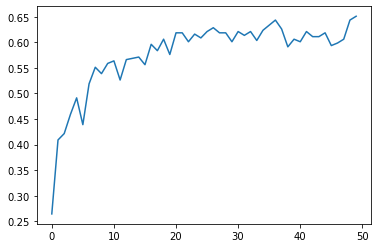

Epoch 1/50
30/30 [==============================] - 10s 304ms/step - loss: 1.3868 - accuracy: 0.2585 - val_loss: 1.3586 - val_accuracy: 0.3716
Epoch 2/50
30/30 [==============================] - 9s 309ms/step - loss: 1.3108 - accuracy: 0.3739 - val_loss: 1.4107 - val_accuracy: 0.3242
Epoch 3/50
30/30 [==============================] - 9s 292ms/step - loss: 1.3221 - accuracy: 0.3846 - val_loss: 1.3136 - val_accuracy: 0.3242
Epoch 4/50
30/30 [==============================] - 9s 292ms/step - loss: 1.2461 - accuracy: 0.4167 - val_loss: 1.2388 - val_accuracy: 0.4165
Epoch 5/50
30/30 [==============================] - 9s 306ms/step - loss: 1.2164 - accuracy: 0.4434 - val_loss: 1.2581 - val_accuracy: 0.4314
Epoch 6/50
30/30 [==============================] - 9s 296ms/step - loss: 1.1773 - accuracy: 0.4530 - val_loss: 1.1442 - val_accuracy: 0.4788
Epoch 7/50
30/30 [==============================] - 9s 298ms/step - loss: 1.0765 - accuracy: 0.5256 - val_loss: 1.2331 - val_accuracy: 0.4713
Epoch

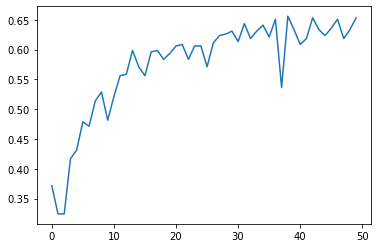

Epoch 1/50
30/30 [==============================] - 10s 305ms/step - loss: 1.3863 - accuracy: 0.2650 - val_loss: 1.3451 - val_accuracy: 0.4190
Epoch 2/50
30/30 [==============================] - 10s 315ms/step - loss: 1.3085 - accuracy: 0.3889 - val_loss: 1.2371 - val_accuracy: 0.4489
Epoch 3/50
30/30 [==============================] - 10s 310ms/step - loss: 1.2274 - accuracy: 0.4498 - val_loss: 1.1965 - val_accuracy: 0.4539
Epoch 4/50
30/30 [==============================] - 9s 300ms/step - loss: 1.1533 - accuracy: 0.4893 - val_loss: 1.1920 - val_accuracy: 0.4688
Epoch 5/50
30/30 [==============================] - 9s 302ms/step - loss: 1.1402 - accuracy: 0.5053 - val_loss: 1.1808 - val_accuracy: 0.4688
Epoch 6/50
30/30 [==============================] - 9s 298ms/step - loss: 1.0954 - accuracy: 0.5150 - val_loss: 1.2250 - val_accuracy: 0.4514
Epoch 7/50
30/30 [==============================] - 9s 306ms/step - loss: 1.0453 - accuracy: 0.5470 - val_loss: 1.0628 - val_accuracy: 0.5411
Epo

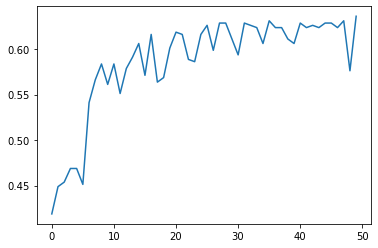

Epoch 1/50
30/30 [==============================] - 10s 320ms/step - loss: 1.3951 - accuracy: 0.2756 - val_loss: 1.3703 - val_accuracy: 0.2818
Epoch 2/50
30/30 [==============================] - 10s 313ms/step - loss: 1.3389 - accuracy: 0.3462 - val_loss: 1.2705 - val_accuracy: 0.4190
Epoch 3/50
30/30 [==============================] - 10s 317ms/step - loss: 1.2505 - accuracy: 0.4199 - val_loss: 1.2623 - val_accuracy: 0.3890
Epoch 4/50
30/30 [==============================] - 10s 322ms/step - loss: 1.2016 - accuracy: 0.4583 - val_loss: 1.1901 - val_accuracy: 0.4364
Epoch 5/50
30/30 [==============================] - 9s 291ms/step - loss: 1.1333 - accuracy: 0.4690 - val_loss: 1.1944 - val_accuracy: 0.4688
Epoch 6/50
30/30 [==============================] - 9s 289ms/step - loss: 1.0967 - accuracy: 0.5043 - val_loss: 1.1967 - val_accuracy: 0.4638
Epoch 7/50
30/30 [==============================] - 9s 299ms/step - loss: 1.0680 - accuracy: 0.5278 - val_loss: 1.0920 - val_accuracy: 0.5262
Ep

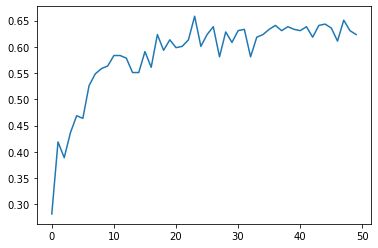

--------------------------------
prop: 0.5
--------------------------------
Epoch 1/50
30/30 [==============================] - 9s 297ms/step - loss: 1.3864 - accuracy: 0.2703 - val_loss: 1.3559 - val_accuracy: 0.2868
Epoch 2/50
30/30 [==============================] - 9s 294ms/step - loss: 1.3368 - accuracy: 0.3590 - val_loss: 1.2778 - val_accuracy: 0.3990
Epoch 3/50
30/30 [==============================] - 10s 311ms/step - loss: 1.2903 - accuracy: 0.3835 - val_loss: 1.2475 - val_accuracy: 0.4214
Epoch 4/50
30/30 [==============================] - 9s 307ms/step - loss: 1.2022 - accuracy: 0.4615 - val_loss: 1.1733 - val_accuracy: 0.4763
Epoch 5/50
30/30 [==============================] - 9s 295ms/step - loss: 1.2149 - accuracy: 0.4455 - val_loss: 1.1745 - val_accuracy: 0.4613
Epoch 6/50
30/30 [==============================] - 9s 306ms/step - loss: 1.1602 - accuracy: 0.4829 - val_loss: 1.2047 - val_accuracy: 0.4514
Epoch 7/50
30/30 [==============================] - 10s 317ms/step - lo

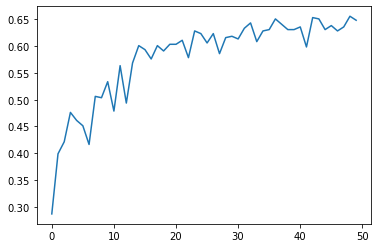

Epoch 1/50
30/30 [==============================] - 10s 300ms/step - loss: 1.3898 - accuracy: 0.2724 - val_loss: 1.3559 - val_accuracy: 0.3491
Epoch 2/50
30/30 [==============================] - 9s 289ms/step - loss: 1.3312 - accuracy: 0.3729 - val_loss: 1.2996 - val_accuracy: 0.3990
Epoch 3/50
30/30 [==============================] - 9s 294ms/step - loss: 1.3094 - accuracy: 0.3707 - val_loss: 1.2529 - val_accuracy: 0.4239
Epoch 4/50
30/30 [==============================] - 9s 288ms/step - loss: 1.2360 - accuracy: 0.4220 - val_loss: 1.2113 - val_accuracy: 0.4314
Epoch 5/50
30/30 [==============================] - 9s 290ms/step - loss: 1.2001 - accuracy: 0.4551 - val_loss: 1.2049 - val_accuracy: 0.4564
Epoch 6/50
30/30 [==============================] - 9s 289ms/step - loss: 1.1326 - accuracy: 0.4989 - val_loss: 1.2889 - val_accuracy: 0.4339
Epoch 7/50
30/30 [==============================] - 9s 289ms/step - loss: 1.1222 - accuracy: 0.4882 - val_loss: 1.1482 - val_accuracy: 0.4913
Epoch

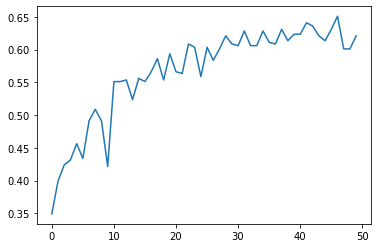

Epoch 1/50
30/30 [==============================] - 10s 326ms/step - loss: 1.3846 - accuracy: 0.2895 - val_loss: 1.3735 - val_accuracy: 0.3990
Epoch 2/50
30/30 [==============================] - 9s 298ms/step - loss: 1.3428 - accuracy: 0.3579 - val_loss: 1.2877 - val_accuracy: 0.4065
Epoch 3/50
30/30 [==============================] - 10s 309ms/step - loss: 1.2757 - accuracy: 0.4006 - val_loss: 1.3422 - val_accuracy: 0.3516
Epoch 4/50
30/30 [==============================] - 9s 303ms/step - loss: 1.2503 - accuracy: 0.4156 - val_loss: 1.1981 - val_accuracy: 0.4539
Epoch 5/50
30/30 [==============================] - 9s 301ms/step - loss: 1.1654 - accuracy: 0.4861 - val_loss: 1.1768 - val_accuracy: 0.4514
Epoch 6/50
30/30 [==============================] - 9s 288ms/step - loss: 1.1400 - accuracy: 0.4904 - val_loss: 1.3059 - val_accuracy: 0.4040
Epoch 7/50
30/30 [==============================] - 9s 303ms/step - loss: 1.1303 - accuracy: 0.5043 - val_loss: 1.1310 - val_accuracy: 0.5162
Epoc

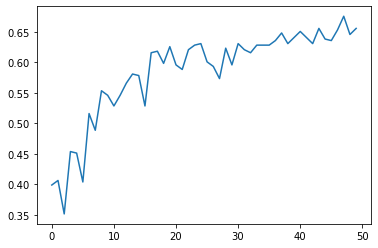

Epoch 1/50
30/30 [==============================] - 10s 304ms/step - loss: 1.3936 - accuracy: 0.2585 - val_loss: 1.3685 - val_accuracy: 0.2469
Epoch 2/50
30/30 [==============================] - 9s 303ms/step - loss: 1.3516 - accuracy: 0.3280 - val_loss: 1.2999 - val_accuracy: 0.3766
Epoch 3/50
30/30 [==============================] - 9s 297ms/step - loss: 1.2750 - accuracy: 0.4060 - val_loss: 1.2708 - val_accuracy: 0.3890
Epoch 4/50
30/30 [==============================] - 9s 297ms/step - loss: 1.2202 - accuracy: 0.4391 - val_loss: 1.2382 - val_accuracy: 0.4414
Epoch 5/50
30/30 [==============================] - 10s 312ms/step - loss: 1.1999 - accuracy: 0.4391 - val_loss: 1.2089 - val_accuracy: 0.4688
Epoch 6/50
30/30 [==============================] - 9s 303ms/step - loss: 1.1497 - accuracy: 0.4744 - val_loss: 1.1966 - val_accuracy: 0.4638
Epoch 7/50
30/30 [==============================] - 9s 300ms/step - loss: 1.1144 - accuracy: 0.4850 - val_loss: 1.1051 - val_accuracy: 0.5037
Epoc

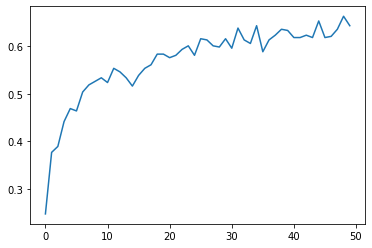

Epoch 1/50
30/30 [==============================] - 9s 296ms/step - loss: 1.3901 - accuracy: 0.2479 - val_loss: 1.3697 - val_accuracy: 0.2494
Epoch 2/50
30/30 [==============================] - 9s 306ms/step - loss: 1.3441 - accuracy: 0.3333 - val_loss: 1.2941 - val_accuracy: 0.3915
Epoch 3/50
30/30 [==============================] - 9s 301ms/step - loss: 1.2783 - accuracy: 0.3889 - val_loss: 1.2678 - val_accuracy: 0.3940
Epoch 4/50
30/30 [==============================] - 9s 289ms/step - loss: 1.2649 - accuracy: 0.4167 - val_loss: 1.2459 - val_accuracy: 0.4190
Epoch 5/50
30/30 [==============================] - 9s 292ms/step - loss: 1.1892 - accuracy: 0.4519 - val_loss: 1.1662 - val_accuracy: 0.4464
Epoch 6/50
30/30 [==============================] - 9s 296ms/step - loss: 1.1409 - accuracy: 0.4840 - val_loss: 1.1310 - val_accuracy: 0.4713
Epoch 7/50
30/30 [==============================] - 10s 310ms/step - loss: 1.1068 - accuracy: 0.4904 - val_loss: 1.1269 - val_accuracy: 0.5112
Epoch

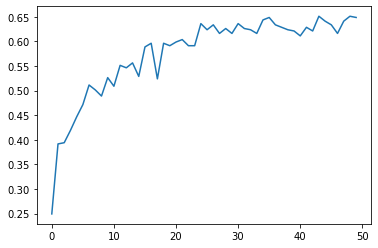

In [11]:
props = [.2, .35, .5]    #Proportions of data to drop
results = []
for i in props:
    print('--------------------------------')
    print('prop: ' + str(i))
    print('--------------------------------')
    acc = []
    for j in range(5):                  #Number of trials per proportion (will take average of results)
        acc.append(TestDrop(epochs, i)[1])
    results.append(sum(acc)/len(acc))

In [20]:
#Latest model with L2

def TestReg(epochs, reg):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu', kernel_regularizer = regularizers.l2(reg)))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax', kernel_regularizer = regularizers.l2(reg)))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

--------------------------------
prop: 0.01
--------------------------------
Epoch 1/50
30/30 [==============================] - 10s 303ms/step - loss: 1.3822 - accuracy: 0.3034 - val_loss: 1.3386 - val_accuracy: 0.3242
Epoch 2/50
30/30 [==============================] - 9s 278ms/step - loss: 1.2661 - accuracy: 0.3953 - val_loss: 1.2840 - val_accuracy: 0.4065
Epoch 3/50
30/30 [==============================] - 9s 277ms/step - loss: 1.1803 - accuracy: 0.4573 - val_loss: 1.2134 - val_accuracy: 0.4539
Epoch 4/50
30/30 [==============================] - 9s 283ms/step - loss: 1.1872 - accuracy: 0.4519 - val_loss: 1.3444 - val_accuracy: 0.3840
Epoch 5/50
30/30 [==============================] - 9s 277ms/step - loss: 1.1510 - accuracy: 0.5160 - val_loss: 1.1387 - val_accuracy: 0.5112
Epoch 6/50
30/30 [==============================] - 9s 276ms/step - loss: 1.0549 - accuracy: 0.5299 - val_loss: 1.1439 - val_accuracy: 0.5037
Epoch 7/50
30/30 [==============================] - 9s 280ms/step - lo

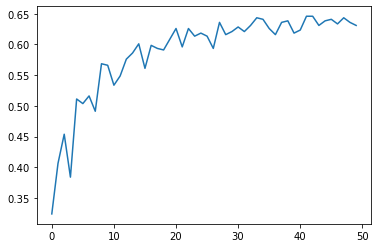

Epoch 1/50
30/30 [==============================] - 10s 312ms/step - loss: 1.3910 - accuracy: 0.2895 - val_loss: 1.3543 - val_accuracy: 0.3092
Epoch 2/50
30/30 [==============================] - 10s 310ms/step - loss: 1.3121 - accuracy: 0.3793 - val_loss: 1.2898 - val_accuracy: 0.4115
Epoch 3/50
30/30 [==============================] - 10s 310ms/step - loss: 1.2070 - accuracy: 0.4487 - val_loss: 1.1548 - val_accuracy: 0.4813
Epoch 4/50
30/30 [==============================] - 10s 309ms/step - loss: 1.1510 - accuracy: 0.4968 - val_loss: 1.1401 - val_accuracy: 0.4813
Epoch 5/50
30/30 [==============================] - 10s 308ms/step - loss: 1.0744 - accuracy: 0.5353 - val_loss: 1.1198 - val_accuracy: 0.5087
Epoch 6/50
30/30 [==============================] - 9s 306ms/step - loss: 1.0133 - accuracy: 0.5705 - val_loss: 1.0869 - val_accuracy: 0.5312
Epoch 7/50
30/30 [==============================] - 9s 299ms/step - loss: 0.9447 - accuracy: 0.6036 - val_loss: 1.0927 - val_accuracy: 0.5312
E

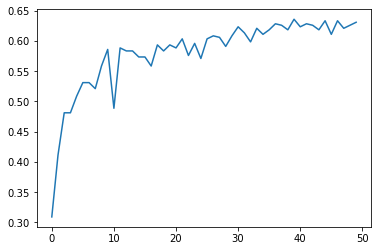

Epoch 1/50
30/30 [==============================] - 10s 317ms/step - loss: 1.3882 - accuracy: 0.2970 - val_loss: 1.3360 - val_accuracy: 0.3965
Epoch 2/50
30/30 [==============================] - 9s 305ms/step - loss: 1.2787 - accuracy: 0.4124 - val_loss: 1.2475 - val_accuracy: 0.4115
Epoch 3/50
30/30 [==============================] - 10s 319ms/step - loss: 1.2025 - accuracy: 0.4444 - val_loss: 1.2223 - val_accuracy: 0.4015
Epoch 4/50
30/30 [==============================] - 10s 323ms/step - loss: 1.1818 - accuracy: 0.4701 - val_loss: 1.1705 - val_accuracy: 0.4788
Epoch 5/50
30/30 [==============================] - 10s 328ms/step - loss: 1.0889 - accuracy: 0.5235 - val_loss: 1.1711 - val_accuracy: 0.4564
Epoch 6/50
30/30 [==============================] - 10s 317ms/step - loss: 1.0142 - accuracy: 0.5513 - val_loss: 1.0717 - val_accuracy: 0.5287
Epoch 7/50
30/30 [==============================] - 9s 304ms/step - loss: 1.0104 - accuracy: 0.5876 - val_loss: 1.1369 - val_accuracy: 0.5187
E

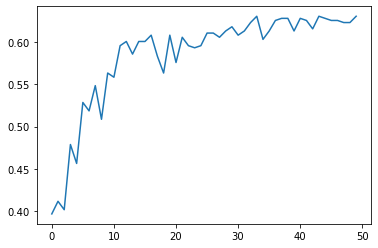

Epoch 1/50
30/30 [==============================] - 10s 304ms/step - loss: 1.3677 - accuracy: 0.3216 - val_loss: 1.3360 - val_accuracy: 0.3516
Epoch 2/50
30/30 [==============================] - 9s 304ms/step - loss: 1.3019 - accuracy: 0.3782 - val_loss: 1.2388 - val_accuracy: 0.4364
Epoch 3/50
30/30 [==============================] - 9s 303ms/step - loss: 1.2250 - accuracy: 0.4370 - val_loss: 1.2463 - val_accuracy: 0.4364
Epoch 4/50
30/30 [==============================] - 9s 297ms/step - loss: 1.1235 - accuracy: 0.4979 - val_loss: 1.1146 - val_accuracy: 0.5212
Epoch 5/50
30/30 [==============================] - 9s 300ms/step - loss: 1.0983 - accuracy: 0.5043 - val_loss: 1.1674 - val_accuracy: 0.4713
Epoch 6/50
30/30 [==============================] - 9s 299ms/step - loss: 1.0296 - accuracy: 0.5748 - val_loss: 1.0978 - val_accuracy: 0.5137
Epoch 7/50
30/30 [==============================] - 9s 300ms/step - loss: 0.9867 - accuracy: 0.5759 - val_loss: 1.0459 - val_accuracy: 0.5586
Epoch

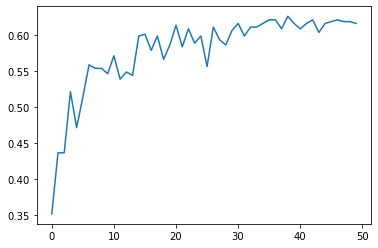

Epoch 1/50
30/30 [==============================] - 10s 298ms/step - loss: 1.3674 - accuracy: 0.3056 - val_loss: 1.3369 - val_accuracy: 0.3342
Epoch 2/50
30/30 [==============================] - 9s 298ms/step - loss: 1.2611 - accuracy: 0.4092 - val_loss: 1.1912 - val_accuracy: 0.4464
Epoch 3/50
30/30 [==============================] - 9s 297ms/step - loss: 1.1983 - accuracy: 0.4722 - val_loss: 1.1768 - val_accuracy: 0.4988
Epoch 4/50
30/30 [==============================] - 9s 297ms/step - loss: 1.1344 - accuracy: 0.4989 - val_loss: 1.1961 - val_accuracy: 0.4589
Epoch 5/50
30/30 [==============================] - 9s 298ms/step - loss: 1.0640 - accuracy: 0.5374 - val_loss: 1.1683 - val_accuracy: 0.4738
Epoch 6/50
30/30 [==============================] - 9s 302ms/step - loss: 1.0394 - accuracy: 0.5588 - val_loss: 1.1155 - val_accuracy: 0.5187
Epoch 7/50
30/30 [==============================] - 9s 300ms/step - loss: 1.0008 - accuracy: 0.5833 - val_loss: 1.2165 - val_accuracy: 0.4439
Epoch

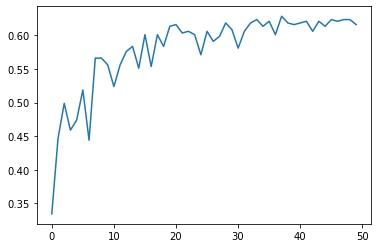

--------------------------------
prop: 0.001
--------------------------------
Epoch 1/50
30/30 [==============================] - 10s 300ms/step - loss: 1.3603 - accuracy: 0.3248 - val_loss: 1.3202 - val_accuracy: 0.3516
Epoch 2/50
30/30 [==============================] - 9s 304ms/step - loss: 1.2476 - accuracy: 0.4327 - val_loss: 1.2834 - val_accuracy: 0.4239
Epoch 3/50
30/30 [==============================] - 9s 296ms/step - loss: 1.1830 - accuracy: 0.4786 - val_loss: 1.1370 - val_accuracy: 0.4738
Epoch 4/50
30/30 [==============================] - 9s 294ms/step - loss: 1.1041 - accuracy: 0.5128 - val_loss: 1.2668 - val_accuracy: 0.3990
Epoch 5/50
30/30 [==============================] - 9s 297ms/step - loss: 1.0577 - accuracy: 0.5278 - val_loss: 1.0763 - val_accuracy: 0.5561
Epoch 6/50
30/30 [==============================] - 9s 296ms/step - loss: 1.0053 - accuracy: 0.5630 - val_loss: 1.0677 - val_accuracy: 0.5362
Epoch 7/50
30/30 [==============================] - 9s 296ms/step - l

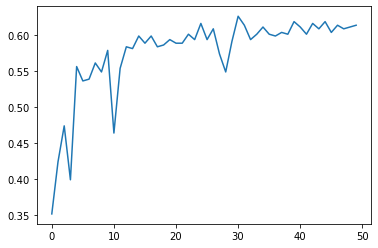

Epoch 1/50
30/30 [==============================] - 10s 315ms/step - loss: 1.3789 - accuracy: 0.3109 - val_loss: 1.3145 - val_accuracy: 0.3990
Epoch 2/50
30/30 [==============================] - 9s 302ms/step - loss: 1.2921 - accuracy: 0.3729 - val_loss: 1.3027 - val_accuracy: 0.3915
Epoch 3/50
30/30 [==============================] - 9s 302ms/step - loss: 1.2301 - accuracy: 0.4530 - val_loss: 1.2638 - val_accuracy: 0.3990
Epoch 4/50
30/30 [==============================] - 9s 302ms/step - loss: 1.2048 - accuracy: 0.4274 - val_loss: 1.1512 - val_accuracy: 0.4913
Epoch 5/50
30/30 [==============================] - 9s 301ms/step - loss: 1.1253 - accuracy: 0.4979 - val_loss: 1.1754 - val_accuracy: 0.4788
Epoch 6/50
30/30 [==============================] - 9s 303ms/step - loss: 1.0741 - accuracy: 0.5246 - val_loss: 1.0819 - val_accuracy: 0.5312
Epoch 7/50
30/30 [==============================] - 9s 301ms/step - loss: 0.9945 - accuracy: 0.5791 - val_loss: 1.2911 - val_accuracy: 0.4115
Epoch

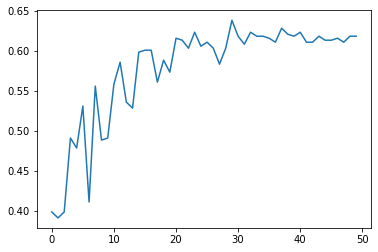

Epoch 1/50
30/30 [==============================] - 10s 318ms/step - loss: 1.3830 - accuracy: 0.2682 - val_loss: 1.3499 - val_accuracy: 0.2993
Epoch 2/50
30/30 [==============================] - 9s 301ms/step - loss: 1.2724 - accuracy: 0.4199 - val_loss: 1.2370 - val_accuracy: 0.4264
Epoch 3/50
30/30 [==============================] - 9s 300ms/step - loss: 1.2366 - accuracy: 0.4145 - val_loss: 1.2226 - val_accuracy: 0.4414
Epoch 4/50
30/30 [==============================] - 9s 299ms/step - loss: 1.1260 - accuracy: 0.4904 - val_loss: 1.3227 - val_accuracy: 0.4165
Epoch 5/50
30/30 [==============================] - 9s 299ms/step - loss: 1.1671 - accuracy: 0.5053 - val_loss: 1.1045 - val_accuracy: 0.5162
Epoch 6/50
30/30 [==============================] - 9s 298ms/step - loss: 1.0265 - accuracy: 0.5459 - val_loss: 1.1694 - val_accuracy: 0.4938
Epoch 7/50
30/30 [==============================] - 9s 300ms/step - loss: 1.0099 - accuracy: 0.5726 - val_loss: 1.0629 - val_accuracy: 0.5486
Epoch

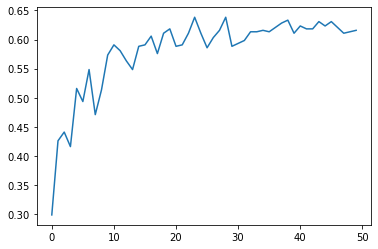

Epoch 1/50
30/30 [==============================] - 13s 389ms/step - loss: 1.3832 - accuracy: 0.2959 - val_loss: 1.3418 - val_accuracy: 0.3716
Epoch 2/50
30/30 [==============================] - 12s 388ms/step - loss: 1.2924 - accuracy: 0.3814 - val_loss: 1.2296 - val_accuracy: 0.4264
Epoch 3/50
30/30 [==============================] - 12s 387ms/step - loss: 1.2239 - accuracy: 0.4402 - val_loss: 1.2318 - val_accuracy: 0.4289
Epoch 4/50
30/30 [==============================] - 12s 386ms/step - loss: 1.1556 - accuracy: 0.4808 - val_loss: 1.2291 - val_accuracy: 0.4214
Epoch 5/50
30/30 [==============================] - 12s 394ms/step - loss: 1.1014 - accuracy: 0.5449 - val_loss: 1.1849 - val_accuracy: 0.4863
Epoch 6/50
30/30 [==============================] - 12s 390ms/step - loss: 1.0690 - accuracy: 0.5534 - val_loss: 1.0989 - val_accuracy: 0.5387
Epoch 7/50
30/30 [==============================] - 12s 388ms/step - loss: 0.9811 - accuracy: 0.5855 - val_loss: 1.1608 - val_accuracy: 0.4713

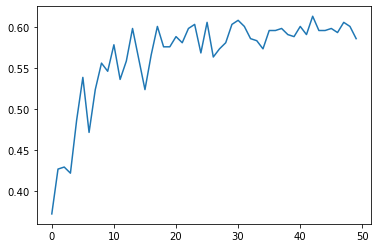

Epoch 1/50
30/30 [==============================] - 9s 292ms/step - loss: 1.3764 - accuracy: 0.3066 - val_loss: 1.3230 - val_accuracy: 0.3616
Epoch 2/50
30/30 [==============================] - 9s 288ms/step - loss: 1.2637 - accuracy: 0.4135 - val_loss: 1.1948 - val_accuracy: 0.4439
Epoch 3/50
30/30 [==============================] - 9s 287ms/step - loss: 1.2168 - accuracy: 0.4530 - val_loss: 1.1637 - val_accuracy: 0.4738
Epoch 4/50
30/30 [==============================] - 9s 288ms/step - loss: 1.1506 - accuracy: 0.4936 - val_loss: 1.1177 - val_accuracy: 0.4913
Epoch 5/50
30/30 [==============================] - 9s 288ms/step - loss: 1.0562 - accuracy: 0.5502 - val_loss: 1.2188 - val_accuracy: 0.4738
Epoch 6/50
30/30 [==============================] - 9s 288ms/step - loss: 1.0728 - accuracy: 0.5064 - val_loss: 1.1110 - val_accuracy: 0.5212
Epoch 7/50
30/30 [==============================] - 9s 287ms/step - loss: 0.9782 - accuracy: 0.5919 - val_loss: 1.0787 - val_accuracy: 0.5511
Epoch 

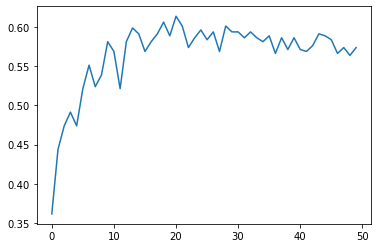

--------------------------------
prop: 0.01
--------------------------------
Epoch 1/50
30/30 [==============================] - 9s 291ms/step - loss: 1.3798 - accuracy: 0.2885 - val_loss: 1.3532 - val_accuracy: 0.2793
Epoch 2/50
30/30 [==============================] - 9s 287ms/step - loss: 1.2940 - accuracy: 0.3942 - val_loss: 1.2740 - val_accuracy: 0.4065
Epoch 3/50
30/30 [==============================] - 9s 289ms/step - loss: 1.2533 - accuracy: 0.4241 - val_loss: 1.2168 - val_accuracy: 0.4589
Epoch 4/50
30/30 [==============================] - 9s 288ms/step - loss: 1.1619 - accuracy: 0.4904 - val_loss: 1.1781 - val_accuracy: 0.4613
Epoch 5/50
30/30 [==============================] - 9s 288ms/step - loss: 1.0738 - accuracy: 0.5299 - val_loss: 1.2334 - val_accuracy: 0.4788
Epoch 6/50
30/30 [==============================] - 9s 289ms/step - loss: 1.0630 - accuracy: 0.5374 - val_loss: 1.1375 - val_accuracy: 0.4613
Epoch 7/50
30/30 [==============================] - 9s 289ms/step - los

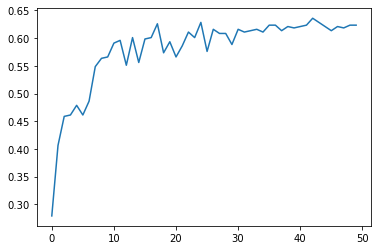

Epoch 1/50
30/30 [==============================] - 9s 294ms/step - loss: 1.3700 - accuracy: 0.3109 - val_loss: 1.3018 - val_accuracy: 0.3741
Epoch 2/50
30/30 [==============================] - 9s 288ms/step - loss: 1.2530 - accuracy: 0.4124 - val_loss: 1.2166 - val_accuracy: 0.4414
Epoch 3/50
30/30 [==============================] - 9s 289ms/step - loss: 1.1809 - accuracy: 0.4519 - val_loss: 1.4301 - val_accuracy: 0.3741
Epoch 4/50
30/30 [==============================] - 9s 290ms/step - loss: 1.1502 - accuracy: 0.4797 - val_loss: 1.2175 - val_accuracy: 0.4564
Epoch 5/50
30/30 [==============================] - 9s 291ms/step - loss: 1.0816 - accuracy: 0.5353 - val_loss: 1.3256 - val_accuracy: 0.4314
Epoch 6/50
30/30 [==============================] - 9s 289ms/step - loss: 1.0800 - accuracy: 0.5363 - val_loss: 1.0886 - val_accuracy: 0.5212
Epoch 7/50
30/30 [==============================] - 9s 290ms/step - loss: 0.9539 - accuracy: 0.5876 - val_loss: 1.1729 - val_accuracy: 0.4963
Epoch 

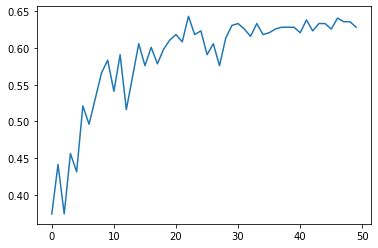

Epoch 1/50
30/30 [==============================] - 9s 290ms/step - loss: 1.3854 - accuracy: 0.2585 - val_loss: 1.3715 - val_accuracy: 0.2569
Epoch 2/50
30/30 [==============================] - 9s 288ms/step - loss: 1.3136 - accuracy: 0.3729 - val_loss: 1.2539 - val_accuracy: 0.4165
Epoch 3/50
30/30 [==============================] - 9s 287ms/step - loss: 1.2343 - accuracy: 0.4327 - val_loss: 1.2588 - val_accuracy: 0.4339
Epoch 4/50
30/30 [==============================] - 9s 288ms/step - loss: 1.1455 - accuracy: 0.4957 - val_loss: 1.3194 - val_accuracy: 0.4239
Epoch 5/50
30/30 [==============================] - 9s 301ms/step - loss: 1.1273 - accuracy: 0.5053 - val_loss: 1.2054 - val_accuracy: 0.4589
Epoch 6/50
30/30 [==============================] - 9s 298ms/step - loss: 1.0563 - accuracy: 0.5459 - val_loss: 1.1551 - val_accuracy: 0.5187
Epoch 7/50
30/30 [==============================] - 10s 315ms/step - loss: 1.0166 - accuracy: 0.5577 - val_loss: 1.1240 - val_accuracy: 0.5262
Epoch

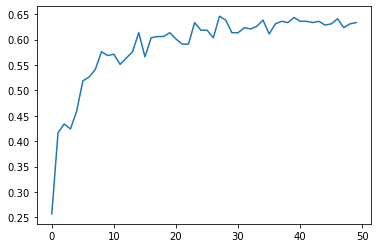

Epoch 1/50
30/30 [==============================] - 9s 277ms/step - loss: 1.3977 - accuracy: 0.2585 - val_loss: 1.3568 - val_accuracy: 0.3566
Epoch 2/50
30/30 [==============================] - 9s 278ms/step - loss: 1.3260 - accuracy: 0.3440 - val_loss: 1.3173 - val_accuracy: 0.3541
Epoch 3/50
30/30 [==============================] - 8s 274ms/step - loss: 1.2684 - accuracy: 0.4370 - val_loss: 1.2471 - val_accuracy: 0.4589
Epoch 4/50
30/30 [==============================] - 8s 273ms/step - loss: 1.1621 - accuracy: 0.4850 - val_loss: 1.2461 - val_accuracy: 0.4364
Epoch 5/50
30/30 [==============================] - 8s 274ms/step - loss: 1.1063 - accuracy: 0.4850 - val_loss: 1.3251 - val_accuracy: 0.4414
Epoch 6/50
30/30 [==============================] - 8s 273ms/step - loss: 1.0940 - accuracy: 0.5406 - val_loss: 1.1188 - val_accuracy: 0.5112
Epoch 7/50
30/30 [==============================] - 8s 273ms/step - loss: 1.0064 - accuracy: 0.5630 - val_loss: 1.1083 - val_accuracy: 0.5212
Epoch 

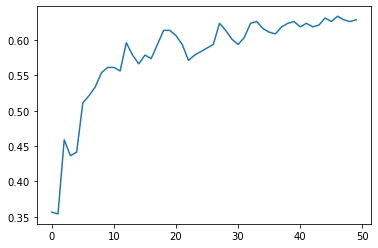

Epoch 1/50
30/30 [==============================] - 9s 286ms/step - loss: 1.3735 - accuracy: 0.3344 - val_loss: 1.3569 - val_accuracy: 0.3117
Epoch 2/50
30/30 [==============================] - 9s 276ms/step - loss: 1.2838 - accuracy: 0.3750 - val_loss: 1.2151 - val_accuracy: 0.4389
Epoch 3/50
30/30 [==============================] - 8s 274ms/step - loss: 1.1932 - accuracy: 0.4594 - val_loss: 1.2138 - val_accuracy: 0.4813
Epoch 4/50
30/30 [==============================] - 8s 274ms/step - loss: 1.1573 - accuracy: 0.4786 - val_loss: 1.1944 - val_accuracy: 0.4489
Epoch 5/50
30/30 [==============================] - 8s 274ms/step - loss: 1.0811 - accuracy: 0.5224 - val_loss: 1.1911 - val_accuracy: 0.4638
Epoch 6/50
30/30 [==============================] - 8s 275ms/step - loss: 1.0111 - accuracy: 0.5588 - val_loss: 1.2021 - val_accuracy: 0.4838
Epoch 7/50
30/30 [==============================] - 8s 274ms/step - loss: 0.9881 - accuracy: 0.5662 - val_loss: 1.0515 - val_accuracy: 0.5436
Epoch 

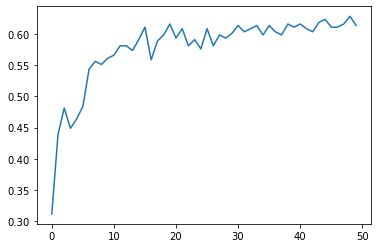

In [21]:
regs = [.01, .001, .01]    #Lambda values
results = []
for i in regs:
    print('--------------------------------')
    print('lam: ' + str(i))
    print('--------------------------------')
    acc = []
    for j in range(5):                  #Number of trials per value (will take average of results)
        acc.append(TestDrop(epochs, i)[1])
    results.append(sum(acc)/len(acc))

In [22]:
results

[0.6334164500236511, 0.625935161113739, 0.6374064922332764]

Epoch 1/50
30/30 [==============================] - 10s 318ms/step - loss: 1.3915 - accuracy: 0.2746 - val_loss: 1.3746 - val_accuracy: 0.2918
Epoch 2/50
30/30 [==============================] - 9s 303ms/step - loss: 1.3613 - accuracy: 0.3098 - val_loss: 1.3185 - val_accuracy: 0.3865
Epoch 3/50
30/30 [==============================] - 9s 296ms/step - loss: 1.3208 - accuracy: 0.3515 - val_loss: 1.2978 - val_accuracy: 0.3840
Epoch 4/50
30/30 [==============================] - 9s 293ms/step - loss: 1.3327 - accuracy: 0.3729 - val_loss: 1.2894 - val_accuracy: 0.4015
Epoch 5/50
30/30 [==============================] - 9s 298ms/step - loss: 1.3066 - accuracy: 0.3611 - val_loss: 1.2918 - val_accuracy: 0.3915
Epoch 6/50
30/30 [==============================] - 9s 294ms/step - loss: 1.2833 - accuracy: 0.4060 - val_loss: 1.2429 - val_accuracy: 0.4589
Epoch 7/50
30/30 [==============================] - 9s 293ms/step - loss: 1.2381 - accuracy: 0.4252 - val_loss: 1.2637 - val_accuracy: 0.3791
Epoch

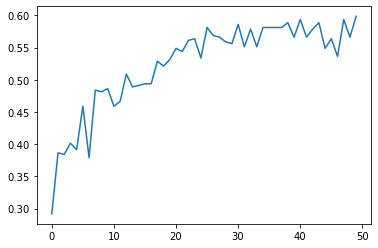

Epoch 1/50
30/30 [==============================] - 10s 299ms/step - loss: 1.3844 - accuracy: 0.2746 - val_loss: 1.3525 - val_accuracy: 0.3367
Epoch 2/50
30/30 [==============================] - 9s 299ms/step - loss: 1.3463 - accuracy: 0.3226 - val_loss: 1.2932 - val_accuracy: 0.3965
Epoch 3/50
30/30 [==============================] - 9s 294ms/step - loss: 1.3401 - accuracy: 0.3397 - val_loss: 1.3022 - val_accuracy: 0.4015
Epoch 4/50
30/30 [==============================] - 9s 293ms/step - loss: 1.2982 - accuracy: 0.3889 - val_loss: 1.3069 - val_accuracy: 0.3815
Epoch 5/50
30/30 [==============================] - 9s 294ms/step - loss: 1.2772 - accuracy: 0.4156 - val_loss: 1.2324 - val_accuracy: 0.4264
Epoch 6/50
30/30 [==============================] - 9s 296ms/step - loss: 1.2529 - accuracy: 0.4177 - val_loss: 1.2492 - val_accuracy: 0.4239
Epoch 7/50
30/30 [==============================] - 9s 297ms/step - loss: 1.2413 - accuracy: 0.4081 - val_loss: 1.1865 - val_accuracy: 0.4464
Epoch

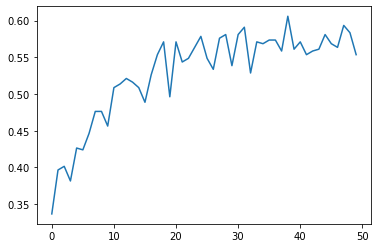

Epoch 1/50
30/30 [==============================] - 9s 275ms/step - loss: 1.3883 - accuracy: 0.2607 - val_loss: 1.3647 - val_accuracy: 0.3317
Epoch 2/50
30/30 [==============================] - 8s 271ms/step - loss: 1.3433 - accuracy: 0.3312 - val_loss: 1.2956 - val_accuracy: 0.4090
Epoch 3/50
30/30 [==============================] - 8s 273ms/step - loss: 1.3073 - accuracy: 0.3697 - val_loss: 1.2964 - val_accuracy: 0.3791
Epoch 4/50
30/30 [==============================] - 9s 301ms/step - loss: 1.2894 - accuracy: 0.3942 - val_loss: 1.3910 - val_accuracy: 0.3342
Epoch 5/50
30/30 [==============================] - 10s 316ms/step - loss: 1.2625 - accuracy: 0.4209 - val_loss: 1.2211 - val_accuracy: 0.4589
Epoch 6/50
30/30 [==============================] - 10s 332ms/step - loss: 1.2411 - accuracy: 0.4252 - val_loss: 1.2607 - val_accuracy: 0.4239
Epoch 7/50
30/30 [==============================] - 10s 315ms/step - loss: 1.2041 - accuracy: 0.4765 - val_loss: 1.1996 - val_accuracy: 0.4514
Epo

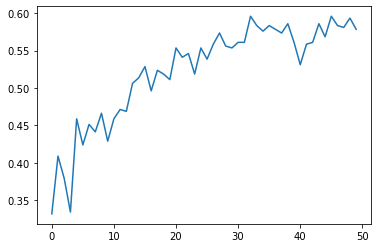

Epoch 1/50
30/30 [==============================] - 9s 282ms/step - loss: 1.3803 - accuracy: 0.2906 - val_loss: 1.3533 - val_accuracy: 0.3067
Epoch 2/50
30/30 [==============================] - 9s 287ms/step - loss: 1.3539 - accuracy: 0.3355 - val_loss: 1.3036 - val_accuracy: 0.4115
Epoch 3/50
30/30 [==============================] - 9s 290ms/step - loss: 1.3515 - accuracy: 0.3451 - val_loss: 1.3189 - val_accuracy: 0.3641
Epoch 4/50
30/30 [==============================] - 9s 286ms/step - loss: 1.3435 - accuracy: 0.3579 - val_loss: 1.3217 - val_accuracy: 0.3466
Epoch 5/50
30/30 [==============================] - 9s 284ms/step - loss: 1.2997 - accuracy: 0.3793 - val_loss: 1.2584 - val_accuracy: 0.4214
Epoch 6/50
30/30 [==============================] - 9s 278ms/step - loss: 1.3012 - accuracy: 0.3857 - val_loss: 1.2753 - val_accuracy: 0.4115
Epoch 7/50
30/30 [==============================] - 9s 279ms/step - loss: 1.2905 - accuracy: 0.4135 - val_loss: 1.2666 - val_accuracy: 0.4115
Epoch 

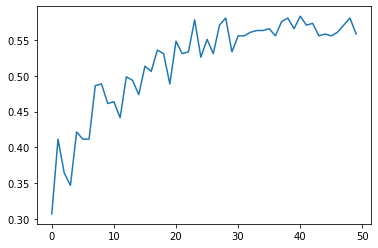

Epoch 1/50
30/30 [==============================] - 12s 391ms/step - loss: 1.3834 - accuracy: 0.2692 - val_loss: 1.3534 - val_accuracy: 0.3716
Epoch 2/50
30/30 [==============================] - 12s 386ms/step - loss: 1.3311 - accuracy: 0.3568 - val_loss: 1.2655 - val_accuracy: 0.4289
Epoch 3/50
30/30 [==============================] - 12s 398ms/step - loss: 1.2967 - accuracy: 0.3771 - val_loss: 1.2730 - val_accuracy: 0.4264
Epoch 4/50
30/30 [==============================] - 12s 388ms/step - loss: 1.2573 - accuracy: 0.3932 - val_loss: 1.2360 - val_accuracy: 0.4115
Epoch 5/50
30/30 [==============================] - 12s 370ms/step - loss: 1.2639 - accuracy: 0.4209 - val_loss: 1.2005 - val_accuracy: 0.4539
Epoch 6/50
30/30 [==============================] - 11s 369ms/step - loss: 1.2105 - accuracy: 0.4434 - val_loss: 1.3067 - val_accuracy: 0.3915
Epoch 7/50
30/30 [==============================] - 11s 362ms/step - loss: 1.2335 - accuracy: 0.4103 - val_loss: 1.1968 - val_accuracy: 0.4663

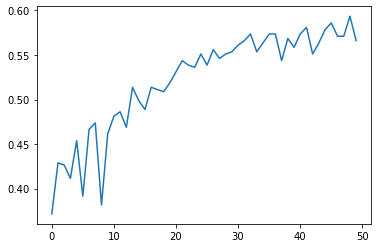

NameError: name 'append' is not defined

In [26]:
#Latest model with average pooling

def TestAvg(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(5):
    acc.append(TestAvg(epochs)[1])
result = sum(acc)/len(acc)

In [28]:
result

0.5955112338066101

Epoch 1/100
30/30 [==============================] - 9s 290ms/step - loss: 1.3860 - accuracy: 0.2575 - val_loss: 1.3620 - val_accuracy: 0.3192
Epoch 2/100
30/30 [==============================] - 9s 294ms/step - loss: 1.3497 - accuracy: 0.3472 - val_loss: 1.3018 - val_accuracy: 0.4015
Epoch 3/100
30/30 [==============================] - 9s 284ms/step - loss: 1.3115 - accuracy: 0.3579 - val_loss: 1.2708 - val_accuracy: 0.3915
Epoch 4/100
30/30 [==============================] - 9s 288ms/step - loss: 1.2956 - accuracy: 0.3932 - val_loss: 1.2928 - val_accuracy: 0.3541
Epoch 5/100
30/30 [==============================] - 9s 284ms/step - loss: 1.2687 - accuracy: 0.4113 - val_loss: 1.2502 - val_accuracy: 0.4115
Epoch 6/100
30/30 [==============================] - 9s 291ms/step - loss: 1.2506 - accuracy: 0.4124 - val_loss: 1.2667 - val_accuracy: 0.4314
Epoch 7/100
30/30 [==============================] - 9s 288ms/step - loss: 1.2031 - accuracy: 0.4530 - val_loss: 1.3717 - val_accuracy: 0.3890

Epoch 58/100
30/30 [==============================] - 9s 283ms/step - loss: 0.3371 - accuracy: 0.8782 - val_loss: 1.4914 - val_accuracy: 0.5885
Epoch 59/100
30/30 [==============================] - 9s 289ms/step - loss: 0.3218 - accuracy: 0.8878 - val_loss: 1.4905 - val_accuracy: 0.5761
Epoch 60/100
30/30 [==============================] - 9s 295ms/step - loss: 0.3288 - accuracy: 0.8814 - val_loss: 1.5376 - val_accuracy: 0.5860
Epoch 61/100
30/30 [==============================] - 9s 287ms/step - loss: 0.3093 - accuracy: 0.8889 - val_loss: 1.4548 - val_accuracy: 0.5736
Epoch 62/100
30/30 [==============================] - 9s 293ms/step - loss: 0.2729 - accuracy: 0.9006 - val_loss: 1.4605 - val_accuracy: 0.5761
Epoch 63/100
30/30 [==============================] - 9s 291ms/step - loss: 0.2817 - accuracy: 0.8932 - val_loss: 1.5830 - val_accuracy: 0.5711
Epoch 64/100
30/30 [==============================] - 9s 295ms/step - loss: 0.2992 - accuracy: 0.8900 - val_loss: 1.6391 - val_accuracy:

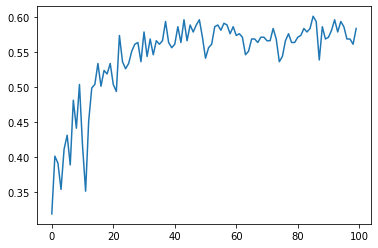

(0.5835411548614502, 0.6009975075721741)

In [31]:
#Testing average pooling with more epochs

TestAvg(100)

Epoch 1/50
30/30 [==============================] - 10s 300ms/step - loss: 1.3876 - accuracy: 0.2991 - val_loss: 1.2753 - val_accuracy: 0.4289
Epoch 2/50
30/30 [==============================] - 9s 300ms/step - loss: 1.2336 - accuracy: 0.4338 - val_loss: 1.2107 - val_accuracy: 0.4638
Epoch 3/50
30/30 [==============================] - 10s 326ms/step - loss: 1.1951 - accuracy: 0.4615 - val_loss: 1.2237 - val_accuracy: 0.4464
Epoch 4/50
30/30 [==============================] - 10s 322ms/step - loss: 1.1556 - accuracy: 0.4861 - val_loss: 1.1427 - val_accuracy: 0.5012
Epoch 5/50
30/30 [==============================] - 10s 327ms/step - loss: 1.1180 - accuracy: 0.5278 - val_loss: 1.1353 - val_accuracy: 0.5037
Epoch 6/50
30/30 [==============================] - 10s 327ms/step - loss: 1.0715 - accuracy: 0.5524 - val_loss: 1.1101 - val_accuracy: 0.5137
Epoch 7/50
30/30 [==============================] - 9s 306ms/step - loss: 1.0121 - accuracy: 0.5823 - val_loss: 1.1368 - val_accuracy: 0.4988
E

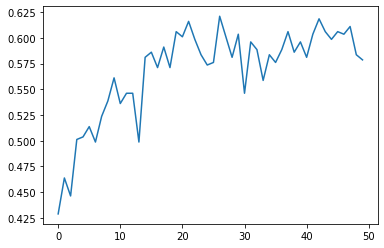

Epoch 1/50
30/30 [==============================] - 9s 296ms/step - loss: 1.3916 - accuracy: 0.3440 - val_loss: 1.2913 - val_accuracy: 0.3591
Epoch 2/50
30/30 [==============================] - 9s 291ms/step - loss: 1.2456 - accuracy: 0.4177 - val_loss: 1.2263 - val_accuracy: 0.4788
Epoch 3/50
30/30 [==============================] - 9s 293ms/step - loss: 1.1808 - accuracy: 0.4829 - val_loss: 1.1393 - val_accuracy: 0.5312
Epoch 4/50
30/30 [==============================] - 9s 292ms/step - loss: 1.1243 - accuracy: 0.5246 - val_loss: 1.3120 - val_accuracy: 0.4364
Epoch 5/50
30/30 [==============================] - 9s 293ms/step - loss: 1.1222 - accuracy: 0.5075 - val_loss: 1.1465 - val_accuracy: 0.4988
Epoch 6/50
30/30 [==============================] - 9s 292ms/step - loss: 1.0400 - accuracy: 0.5556 - val_loss: 1.1343 - val_accuracy: 0.4938
Epoch 7/50
30/30 [==============================] - 10s 324ms/step - loss: 0.9699 - accuracy: 0.5951 - val_loss: 1.0538 - val_accuracy: 0.5636
Epoch

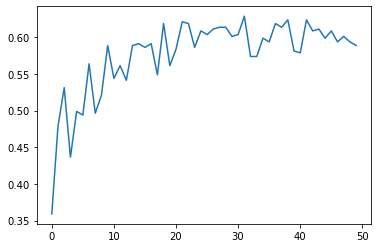

Epoch 1/50
30/30 [==============================] - 9s 296ms/step - loss: 1.3664 - accuracy: 0.3397 - val_loss: 1.3345 - val_accuracy: 0.3591
Epoch 2/50
30/30 [==============================] - 9s 293ms/step - loss: 1.2479 - accuracy: 0.4284 - val_loss: 1.2289 - val_accuracy: 0.4539
Epoch 3/50
30/30 [==============================] - 9s 300ms/step - loss: 1.2056 - accuracy: 0.4359 - val_loss: 1.1994 - val_accuracy: 0.4613
Epoch 4/50
30/30 [==============================] - 9s 301ms/step - loss: 1.1400 - accuracy: 0.4957 - val_loss: 1.2204 - val_accuracy: 0.4738
Epoch 5/50
30/30 [==============================] - 9s 291ms/step - loss: 1.1035 - accuracy: 0.5331 - val_loss: 1.1728 - val_accuracy: 0.4738
Epoch 6/50
30/30 [==============================] - 9s 294ms/step - loss: 1.0657 - accuracy: 0.5385 - val_loss: 1.0866 - val_accuracy: 0.5362
Epoch 7/50
30/30 [==============================] - 9s 293ms/step - loss: 0.9936 - accuracy: 0.5823 - val_loss: 1.0560 - val_accuracy: 0.5586
Epoch 

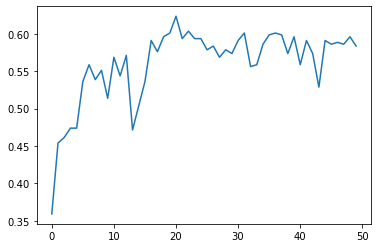

Epoch 1/50
30/30 [==============================] - 10s 309ms/step - loss: 1.3936 - accuracy: 0.2938 - val_loss: 1.2359 - val_accuracy: 0.4439
Epoch 2/50
30/30 [==============================] - 10s 314ms/step - loss: 1.2128 - accuracy: 0.4487 - val_loss: 1.4231 - val_accuracy: 0.3591
Epoch 3/50
30/30 [==============================] - 9s 298ms/step - loss: 1.2247 - accuracy: 0.4391 - val_loss: 1.1520 - val_accuracy: 0.5062
Epoch 4/50
30/30 [==============================] - 9s 293ms/step - loss: 1.1452 - accuracy: 0.4882 - val_loss: 1.1515 - val_accuracy: 0.5087
Epoch 5/50
30/30 [==============================] - 9s 296ms/step - loss: 1.0876 - accuracy: 0.5491 - val_loss: 1.1677 - val_accuracy: 0.4863
Epoch 6/50
30/30 [==============================] - 9s 293ms/step - loss: 1.1160 - accuracy: 0.5128 - val_loss: 1.1427 - val_accuracy: 0.5012
Epoch 7/50
30/30 [==============================] - 10s 334ms/step - loss: 1.0224 - accuracy: 0.5684 - val_loss: 1.1072 - val_accuracy: 0.5436
Epo

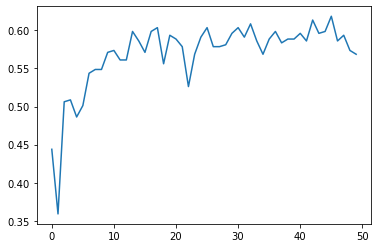

Epoch 1/50
30/30 [==============================] - 10s 319ms/step - loss: 1.3873 - accuracy: 0.3205 - val_loss: 1.2434 - val_accuracy: 0.4439
Epoch 2/50
30/30 [==============================] - 9s 305ms/step - loss: 1.2540 - accuracy: 0.4220 - val_loss: 1.2655 - val_accuracy: 0.4090
Epoch 3/50
30/30 [==============================] - 9s 292ms/step - loss: 1.2301 - accuracy: 0.4306 - val_loss: 1.2300 - val_accuracy: 0.4464
Epoch 4/50
30/30 [==============================] - 10s 318ms/step - loss: 1.1617 - accuracy: 0.4573 - val_loss: 1.1736 - val_accuracy: 0.4913
Epoch 5/50
30/30 [==============================] - 10s 308ms/step - loss: 1.0917 - accuracy: 0.5278 - val_loss: 1.1223 - val_accuracy: 0.5212
Epoch 6/50
30/30 [==============================] - 9s 304ms/step - loss: 1.0497 - accuracy: 0.5609 - val_loss: 1.1089 - val_accuracy: 0.5162
Epoch 7/50
30/30 [==============================] - 10s 316ms/step - loss: 1.0104 - accuracy: 0.5940 - val_loss: 1.0683 - val_accuracy: 0.5711
Ep

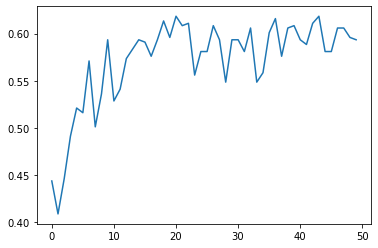

NameError: name 'append' is not defined

In [32]:
#Latest model with tanh activation

def TestTanh(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'tanh', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'tanh', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'tanh', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'tanh'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(5):
    acc.append(TestTanh(epochs)[1])
result = sum(acc)/len(acc)

In [34]:
result

0.6219451427459717

Epoch 1/50
30/30 [==============================] - 11s 350ms/step - loss: 2.0005 - accuracy: 0.4156 - val_loss: 1.3847 - val_accuracy: 0.2519
Epoch 2/50
30/30 [==============================] - 11s 360ms/step - loss: 1.5354 - accuracy: 0.5331 - val_loss: 1.4560 - val_accuracy: 0.2594
Epoch 3/50
30/30 [==============================] - 11s 359ms/step - loss: 1.1538 - accuracy: 0.6197 - val_loss: 1.6653 - val_accuracy: 0.2968
Epoch 4/50
30/30 [==============================] - 11s 356ms/step - loss: 0.8920 - accuracy: 0.6741 - val_loss: 1.4478 - val_accuracy: 0.2943
Epoch 5/50
30/30 [==============================] - 11s 354ms/step - loss: 0.8459 - accuracy: 0.7019 - val_loss: 1.9047 - val_accuracy: 0.2768
Epoch 6/50
30/30 [==============================] - 11s 348ms/step - loss: 0.7999 - accuracy: 0.7137 - val_loss: 2.3268 - val_accuracy: 0.3766
Epoch 7/50
30/30 [==============================] - 11s 357ms/step - loss: 0.6651 - accuracy: 0.7692 - val_loss: 1.8328 - val_accuracy: 0.2968

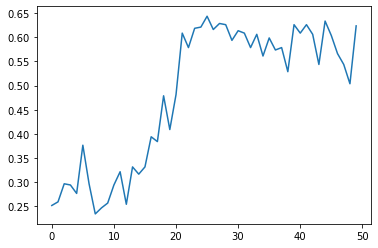

Epoch 1/50
30/30 [==============================] - 9s 292ms/step - loss: 2.0386 - accuracy: 0.4177 - val_loss: 1.3757 - val_accuracy: 0.3067
Epoch 2/50
30/30 [==============================] - 9s 286ms/step - loss: 1.3844 - accuracy: 0.5705 - val_loss: 1.4738 - val_accuracy: 0.2444
Epoch 3/50
30/30 [==============================] - 9s 286ms/step - loss: 1.1279 - accuracy: 0.6090 - val_loss: 1.6061 - val_accuracy: 0.2594
Epoch 4/50
30/30 [==============================] - 9s 287ms/step - loss: 1.0936 - accuracy: 0.6571 - val_loss: 1.8951 - val_accuracy: 0.3067
Epoch 5/50
30/30 [==============================] - 9s 289ms/step - loss: 0.8129 - accuracy: 0.7041 - val_loss: 1.8052 - val_accuracy: 0.2494
Epoch 6/50
30/30 [==============================] - 9s 300ms/step - loss: 0.7643 - accuracy: 0.7425 - val_loss: 2.3889 - val_accuracy: 0.2594
Epoch 7/50
30/30 [==============================] - 10s 315ms/step - loss: 0.5592 - accuracy: 0.7853 - val_loss: 2.9984 - val_accuracy: 0.2369
Epoch

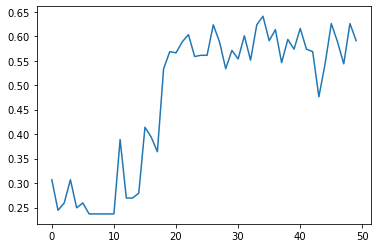

Epoch 1/50
30/30 [==============================] - 11s 322ms/step - loss: 2.0436 - accuracy: 0.4092 - val_loss: 1.4043 - val_accuracy: 0.2594
Epoch 2/50
30/30 [==============================] - 10s 314ms/step - loss: 1.4981 - accuracy: 0.5438 - val_loss: 1.4281 - val_accuracy: 0.3167
Epoch 3/50
30/30 [==============================] - 10s 313ms/step - loss: 1.2291 - accuracy: 0.6004 - val_loss: 1.6223 - val_accuracy: 0.2469
Epoch 4/50
30/30 [==============================] - 10s 320ms/step - loss: 0.9893 - accuracy: 0.6667 - val_loss: 1.8880 - val_accuracy: 0.2369
Epoch 5/50
30/30 [==============================] - 10s 318ms/step - loss: 0.8842 - accuracy: 0.6806 - val_loss: 2.0238 - val_accuracy: 0.2544
Epoch 6/50
30/30 [==============================] - 10s 313ms/step - loss: 0.7052 - accuracy: 0.7468 - val_loss: 2.5045 - val_accuracy: 0.2369
Epoch 7/50
30/30 [==============================] - 10s 318ms/step - loss: 0.6641 - accuracy: 0.7596 - val_loss: 2.8616 - val_accuracy: 0.3267

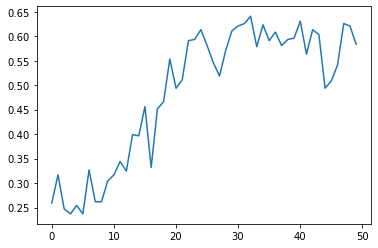

Epoch 1/50
30/30 [==============================] - 11s 326ms/step - loss: 2.0135 - accuracy: 0.4060 - val_loss: 1.3792 - val_accuracy: 0.2643
Epoch 2/50
30/30 [==============================] - 10s 319ms/step - loss: 1.5003 - accuracy: 0.5342 - val_loss: 1.5110 - val_accuracy: 0.3142
Epoch 3/50
30/30 [==============================] - 10s 320ms/step - loss: 1.2256 - accuracy: 0.6047 - val_loss: 2.0409 - val_accuracy: 0.2594
Epoch 4/50
30/30 [==============================] - 10s 317ms/step - loss: 1.0040 - accuracy: 0.6656 - val_loss: 1.4799 - val_accuracy: 0.3616
Epoch 5/50
30/30 [==============================] - 10s 318ms/step - loss: 0.8256 - accuracy: 0.7062 - val_loss: 2.3109 - val_accuracy: 0.2344
Epoch 6/50
30/30 [==============================] - 10s 325ms/step - loss: 0.7629 - accuracy: 0.7286 - val_loss: 2.4969 - val_accuracy: 0.2519
Epoch 7/50
30/30 [==============================] - 10s 336ms/step - loss: 0.6890 - accuracy: 0.7393 - val_loss: 2.2016 - val_accuracy: 0.3142

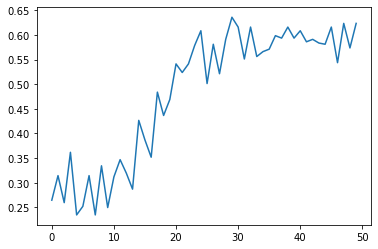

Epoch 1/50
30/30 [==============================] - 10s 322ms/step - loss: 1.9327 - accuracy: 0.4306 - val_loss: 1.3812 - val_accuracy: 0.3392
Epoch 2/50
30/30 [==============================] - 10s 322ms/step - loss: 1.4095 - accuracy: 0.5652 - val_loss: 1.5292 - val_accuracy: 0.2594
Epoch 3/50
30/30 [==============================] - 10s 317ms/step - loss: 1.1589 - accuracy: 0.6261 - val_loss: 1.6142 - val_accuracy: 0.2918
Epoch 4/50
30/30 [==============================] - 10s 319ms/step - loss: 0.9069 - accuracy: 0.6816 - val_loss: 1.8620 - val_accuracy: 0.2743
Epoch 5/50
30/30 [==============================] - 10s 318ms/step - loss: 0.8376 - accuracy: 0.7254 - val_loss: 2.4353 - val_accuracy: 0.3092
Epoch 6/50
30/30 [==============================] - 10s 319ms/step - loss: 0.7689 - accuracy: 0.7361 - val_loss: 2.4555 - val_accuracy: 0.2594
Epoch 7/50
30/30 [==============================] - 10s 322ms/step - loss: 0.6694 - accuracy: 0.7596 - val_loss: 2.4254 - val_accuracy: 0.3167

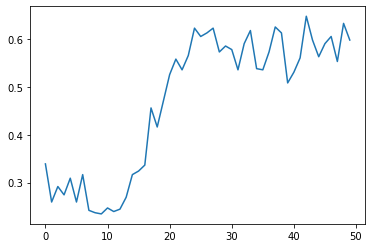

In [50]:
#Latest model with batch normalization

def TestNorm(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.BatchNormalization())
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.BatchNormalization())
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.BatchNormalization())
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.BatchNormalization())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(5):
    acc.append(TestNorm(epochs)[1])
result = sum(acc)/len(acc)

In [51]:
result

0.6418952584266663

--------------------------------
prop: 0.375
--------------------------------
Epoch 1/50
30/30 [==============================] - 9s 279ms/step - loss: 1.3780 - accuracy: 0.2821 - val_loss: 1.3496 - val_accuracy: 0.3691
Epoch 2/50
30/30 [==============================] - 9s 280ms/step - loss: 1.3417 - accuracy: 0.3429 - val_loss: 1.3156 - val_accuracy: 0.4040
Epoch 3/50
30/30 [==============================] - 9s 291ms/step - loss: 1.2954 - accuracy: 0.3932 - val_loss: 1.2949 - val_accuracy: 0.3815
Epoch 4/50
30/30 [==============================] - 9s 306ms/step - loss: 1.2054 - accuracy: 0.4509 - val_loss: 1.1766 - val_accuracy: 0.4713
Epoch 5/50
30/30 [==============================] - 9s 282ms/step - loss: 1.2320 - accuracy: 0.4434 - val_loss: 1.3641 - val_accuracy: 0.3666
Epoch 6/50
30/30 [==============================] - 8s 274ms/step - loss: 1.1902 - accuracy: 0.4754 - val_loss: 1.1262 - val_accuracy: 0.4888
Epoch 7/50
30/30 [==============================] - 8s 274ms/step - lo

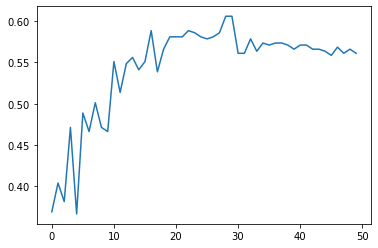

--------------------------------
prop: 0.625
--------------------------------
Epoch 1/50
30/30 [==============================] - 16s 506ms/step - loss: 1.3780 - accuracy: 0.2831 - val_loss: 1.3437 - val_accuracy: 0.2993
Epoch 2/50
30/30 [==============================] - 15s 503ms/step - loss: 1.2991 - accuracy: 0.3825 - val_loss: 1.9157 - val_accuracy: 0.2643
Epoch 3/50
30/30 [==============================] - 15s 496ms/step - loss: 1.3982 - accuracy: 0.2853 - val_loss: 1.3243 - val_accuracy: 0.3591
Epoch 4/50
30/30 [==============================] - 15s 496ms/step - loss: 1.2752 - accuracy: 0.3835 - val_loss: 1.2382 - val_accuracy: 0.4389
Epoch 5/50
30/30 [==============================] - 15s 494ms/step - loss: 1.2465 - accuracy: 0.4199 - val_loss: 1.2440 - val_accuracy: 0.4214
Epoch 6/50
30/30 [==============================] - 15s 496ms/step - loss: 1.1810 - accuracy: 0.4583 - val_loss: 1.1620 - val_accuracy: 0.4613
Epoch 7/50
30/30 [==============================] - 15s 493ms/st

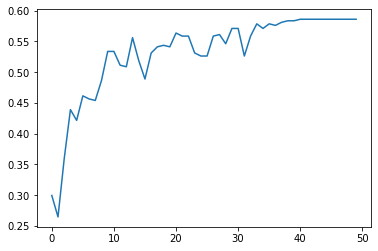

--------------------------------
prop: 0.75
--------------------------------
Epoch 1/50
30/30 [==============================] - 21s 691ms/step - loss: 1.3794 - accuracy: 0.2735 - val_loss: 1.2982 - val_accuracy: 0.3865
Epoch 2/50
30/30 [==============================] - 21s 677ms/step - loss: 1.3500 - accuracy: 0.3077 - val_loss: 1.2953 - val_accuracy: 0.3965
Epoch 3/50
30/30 [==============================] - 20s 668ms/step - loss: 1.2824 - accuracy: 0.3985 - val_loss: 1.2683 - val_accuracy: 0.3716
Epoch 4/50
30/30 [==============================] - 20s 660ms/step - loss: 1.2192 - accuracy: 0.4252 - val_loss: 1.2205 - val_accuracy: 0.4464
Epoch 5/50
30/30 [==============================] - 20s 660ms/step - loss: 1.2000 - accuracy: 0.4712 - val_loss: 1.1407 - val_accuracy: 0.4738
Epoch 6/50
30/30 [==============================] - 20s 675ms/step - loss: 1.1328 - accuracy: 0.4765 - val_loss: 1.1358 - val_accuracy: 0.4938
Epoch 7/50
30/30 [==============================] - 20s 660ms/ste

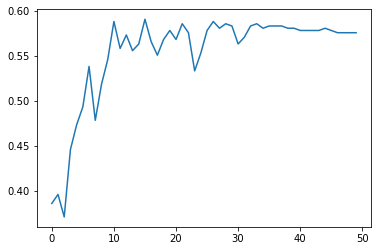

In [39]:
props = [3/8, 5/8, 3/4]    #Proportions of filters to keep
results = []
for i in props:
    print('--------------------------------')
    print('prop: ' + str(i))
    print('--------------------------------')
    acc = []
    for j in range(1):                  #Number of trials per proportion (will take average of results)
        acc.append(AlexModW(epochs, i)[1])
    results.append(sum(acc)/len(acc))

Epoch 1/50
30/30 [==============================] - 32s 908ms/step - loss: 1.3812 - accuracy: 0.2906 - val_loss: 1.3298 - val_accuracy: 0.3516
Epoch 2/50
30/30 [==============================] - 27s 907ms/step - loss: 1.3576 - accuracy: 0.3323 - val_loss: 1.2964 - val_accuracy: 0.3965
Epoch 3/50
30/30 [==============================] - 28s 915ms/step - loss: 1.2972 - accuracy: 0.3835 - val_loss: 1.2787 - val_accuracy: 0.3890
Epoch 4/50
30/30 [==============================] - 27s 907ms/step - loss: 1.2600 - accuracy: 0.3825 - val_loss: 1.2472 - val_accuracy: 0.3965
Epoch 5/50
30/30 [==============================] - 28s 927ms/step - loss: 1.2489 - accuracy: 0.4113 - val_loss: 1.2391 - val_accuracy: 0.4214
Epoch 6/50
30/30 [==============================] - 28s 926ms/step - loss: 1.2024 - accuracy: 0.4380 - val_loss: 1.2320 - val_accuracy: 0.4264
Epoch 7/50
30/30 [==============================] - 28s 936ms/step - loss: 1.1970 - accuracy: 0.4669 - val_loss: 1.2610 - val_accuracy: 0.4065

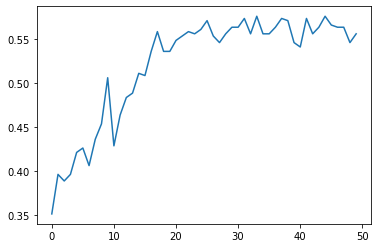

In [53]:
#Latest model with average pooling, more compexity

def TestAvg(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(96, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(256, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(384, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.AvgPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(4096, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(1):
    acc.append(TestAvg(epochs)[1])
result = sum(acc)/len(acc)

Epoch 1/50
30/30 [==============================] - 24s 742ms/step - loss: 1.3917 - accuracy: 0.2927 - val_loss: 1.3192 - val_accuracy: 0.3691
Epoch 2/50
30/30 [==============================] - 23s 748ms/step - loss: 1.3027 - accuracy: 0.3814 - val_loss: 1.2857 - val_accuracy: 0.3890
Epoch 3/50
30/30 [==============================] - 23s 757ms/step - loss: 1.2232 - accuracy: 0.4370 - val_loss: 1.1768 - val_accuracy: 0.4888
Epoch 4/50
30/30 [==============================] - 22s 741ms/step - loss: 1.1408 - accuracy: 0.4915 - val_loss: 1.3997 - val_accuracy: 0.3791
Epoch 5/50
30/30 [==============================] - 22s 738ms/step - loss: 1.0998 - accuracy: 0.5171 - val_loss: 1.2079 - val_accuracy: 0.4663
Epoch 6/50
30/30 [==============================] - 22s 737ms/step - loss: 1.0447 - accuracy: 0.5566 - val_loss: 1.0463 - val_accuracy: 0.5561
Epoch 7/50
30/30 [==============================] - 22s 743ms/step - loss: 0.9667 - accuracy: 0.5748 - val_loss: 1.0473 - val_accuracy: 0.5586

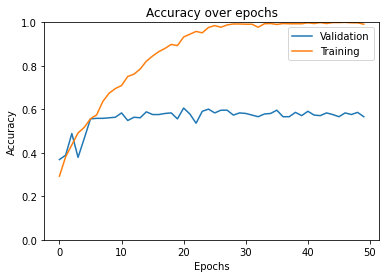

In [10]:
#Shorter strides

def TestMod(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (3,3), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (1,1)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(1):
    acc.append(TestMod(50)[1])
result = sum(acc)/len(acc)

Epoch 1/50
30/30 [==============================] - 8s 247ms/step - loss: 1.3821 - accuracy: 0.2724 - val_loss: 1.3729 - val_accuracy: 0.2918
Epoch 2/50
30/30 [==============================] - 8s 269ms/step - loss: 1.3316 - accuracy: 0.3622 - val_loss: 1.2843 - val_accuracy: 0.4439
Epoch 3/50
30/30 [==============================] - 8s 254ms/step - loss: 1.2402 - accuracy: 0.4306 - val_loss: 1.2559 - val_accuracy: 0.3940
Epoch 4/50
30/30 [==============================] - 8s 262ms/step - loss: 1.1840 - accuracy: 0.4679 - val_loss: 1.2058 - val_accuracy: 0.4539
Epoch 5/50
30/30 [==============================] - 8s 249ms/step - loss: 1.1487 - accuracy: 0.4947 - val_loss: 1.1515 - val_accuracy: 0.4888
Epoch 6/50
30/30 [==============================] - 8s 249ms/step - loss: 1.1330 - accuracy: 0.5342 - val_loss: 1.1297 - val_accuracy: 0.5212
Epoch 7/50
30/30 [==============================] - 8s 268ms/step - loss: 1.0792 - accuracy: 0.5513 - val_loss: 1.1139 - val_accuracy: 0.5262
Epoch 

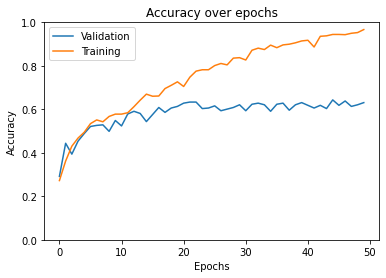

In [206]:
#Smaller kernel sizes

def TestMod(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (6,6), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (4,4), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(1):
    acc.append(TestMod(50)[1])
result = sum(acc)/len(acc)

Epoch 1/50
30/30 [==============================] - 22s 713ms/step - loss: 1.3921 - accuracy: 0.3066 - val_loss: 1.2853 - val_accuracy: 0.4065
Epoch 2/50
30/30 [==============================] - 21s 706ms/step - loss: 1.2620 - accuracy: 0.4295 - val_loss: 1.2529 - val_accuracy: 0.4339
Epoch 3/50
30/30 [==============================] - 20s 673ms/step - loss: 1.1469 - accuracy: 0.5214 - val_loss: 1.1517 - val_accuracy: 0.4638
Epoch 4/50
30/30 [==============================] - 21s 707ms/step - loss: 1.0918 - accuracy: 0.5160 - val_loss: 1.2054 - val_accuracy: 0.4688
Epoch 5/50
30/30 [==============================] - 21s 677ms/step - loss: 1.0623 - accuracy: 0.5449 - val_loss: 1.0933 - val_accuracy: 0.4988
Epoch 6/50
30/30 [==============================] - 21s 686ms/step - loss: 0.9766 - accuracy: 0.5812 - val_loss: 1.0797 - val_accuracy: 0.5486
Epoch 7/50
30/30 [==============================] - 21s 693ms/step - loss: 0.9441 - accuracy: 0.6058 - val_loss: 1.1093 - val_accuracy: 0.5287

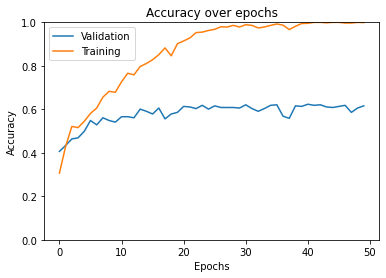

In [207]:
#Smaller kernel sizes and smaller strides

def TestMod(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (6,6), strides = (3,3), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (4,4), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (1,1)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs))

acc = []
for j in range(1):
    acc.append(TestMod(50)[1])
result = sum(acc)/len(acc)

Epoch 1/50
30/30 [==============================] - 9s 287ms/step - loss: 1.3937 - accuracy: 0.2682 - val_loss: 1.3641 - val_accuracy: 0.2693
Epoch 2/50
30/30 [==============================] - 9s 278ms/step - loss: 1.3534 - accuracy: 0.3109 - val_loss: 1.3143 - val_accuracy: 0.3666
Epoch 3/50
30/30 [==============================] - 9s 305ms/step - loss: 1.2900 - accuracy: 0.3793 - val_loss: 1.2706 - val_accuracy: 0.3990
Epoch 4/50
30/30 [==============================] - 9s 290ms/step - loss: 1.2683 - accuracy: 0.4017 - val_loss: 1.2230 - val_accuracy: 0.4613
Epoch 5/50
30/30 [==============================] - 9s 296ms/step - loss: 1.2077 - accuracy: 0.4530 - val_loss: 1.2137 - val_accuracy: 0.4613
Epoch 6/50
30/30 [==============================] - 9s 283ms/step - loss: 1.1426 - accuracy: 0.4936 - val_loss: 1.1817 - val_accuracy: 0.4913
Epoch 7/50
30/30 [==============================] - 9s 278ms/step - loss: 1.0920 - accuracy: 0.5246 - val_loss: 1.1019 - val_accuracy: 0.5162
Epoch 

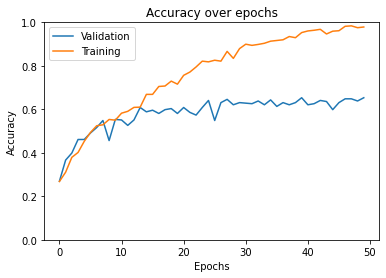

In [32]:
#Final Model

def TestMod(epochs):

    tensorflow.random.set_seed(50)
    numpy.random.seed(50)

    img_mod = models.Sequential()
    img_mod.add(layers.Rescaling(1/255))
    img_mod.add(layers.Conv2D(48, kernel_size = (11,11), strides = (4,4), activation = 'relu', input_shape = shape + (3,)))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(128, kernel_size = (5,5), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Conv2D(192, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    img_mod.add(layers.MaxPool2D(3, strides = (2,2)))
    img_mod.add(layers.Flatten())
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(2048, activation = 'relu'))
    img_mod.add(layers.Dropout(0.5))
    img_mod.add(layers.Dense(len(imgTrain.class_names), activation = 'softmax'))
    img_mod.compile(optimizer = optimizers.Adam(learning_rate = 0.0001),
                    loss = 'sparse_categorical_crossentropy',
                    metrics = ['accuracy'])

    return(Run(img_mod, epochs), img_mod)

acc = []
for j in range(1):
    saved_mod = TestMod(50)
    acc.append(saved_mod[0][1])
result = sum(acc)/len(acc)

In [219]:
#Classification report

results = [(i[1], numpy.argmax(saved_mod[1].predict(i[0]), axis = 1)) for i in imgTest][0]
print(classification_report(results[0], results[1], target_names = imgTest.class_names))

                       precision    recall  f1-score   support

          Edgar_Degas       0.72      0.61      0.66       103
                Other       0.62      0.51      0.56       104
Pierre-Auguste_Renoir       0.67      0.65      0.66        94
     Vincent_van_Gogh       0.61      0.83      0.70       100

             accuracy                           0.65       401
            macro avg       0.65      0.65      0.65       401
         weighted avg       0.65      0.65      0.64       401

